<div style="text-align: center;">
    <h3 style="font-size: 1.8em;"><em>Métodos Numéricos</em></h3>
    <p>Nombre: Presly Morales</p>
    <p>Notebook llB</p>
</div>

# Unidad 1 Preliminares Matemáticos Codificación #1

## Métodos Analíticos

La solución en expresión matemática es exacta 

In [780]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import time
x = 3
x = x**2 + 2*x + 3
print(x)

18


## Métodos Numéricos


La solución de forma numérica y no hay solución exacta.
Aproximación de procesos matemáticos

In [9]:
x = math.sqrt(3)
print(x)

1.7320508075688772


## Exactitud vs Precisión

Exactitud : Los valores obtenidos son cercanos al valor real.
Precisión : Los valores obtenidos son cercanos entre sí.

In [10]:
valor_real = 6
valores_exactos = [5.8 , 6.4 ,5.99 ]
valores_precisos = [5.4 , 5.43 ,5.42 ]
valores_exactos_precisos= [5.99 , 5.99 ,6.01 ]

def promedio(array): 
    if not array: #revisa si el array esta vacio
        return 0
    x = 0
    i = 0
    while i<len(array): #mientras el array este lleno
        
        x+= array[i] #suma todos los elementos
        i+=1
    return x/i #divide la suma para el total de elementos

In [11]:
error_abs_valores_exactos = abs(valor_real - promedio(valores_exactos))
print("Error Abs Valores Exactos: ",error_abs_valores_exactos)
error_abs_valores_precisos = abs(valor_real - promedio(valores_precisos))
print("Error Abs Valores Precisos: ",error_abs_valores_precisos)
error_abs_exactos_precisos = abs(valor_real - promedio(valores_exactos_precisos))
print("Error Abs Valores Exactos y Precisos: ",error_abs_exactos_precisos)

Error Abs Valores Exactos:  0.06333333333333258
Error Abs Valores Precisos:  0.583333333333333
Error Abs Valores Exactos y Precisos:  0.0033333333333329662


## Tipos de errores

### Error de corte o truncamiento

Un algortimo con trucamiento fijo puede ser exacto pero no preciso si se utiliza sin cuidado.>

### Error de Redondeo

Un algoritmo con mucho redondeo puede ser preciso pero no exacto

In [394]:

def truncar(num, cifras):
    if cifras<0:
        return num
    aux = 10**cifras #se obtiene el n espacio de recorrido de la coma
    return int(num*aux)/aux #se recorre la coma hacia der con el aux ,se extrae la parte entera ,y se recorre la coma hacia la der

def redondear(num, cifras):
    if cifras<0:
        return num
    aux = 10**cifras
    return int(num*aux+0.5 if num>=0 else num*aux-0.5)/aux #utiliza la misma logica q la funcion truncar pero se suma 0.5 para hacer el redondeo a un numero =>5
def cifras_significativas(tipo,num,cifras):
    if num != 0:
        if tipo == 1: #truncar
            return truncar(num,cifras-int(f"{num:e}".split('e')[1])-1) 
        if tipo == 2: #redondear
            return redondear(num,cifras-int(f"{num:e}".split('e')[1])-1)
    else:
        return 0
def numcifras(num,cifras=None,tipo=None):
    if cifras != None and tipo!=None:
        if num != 0:
            if tipo[0] == 1:
                return truncar(num,cifras)
            if tipo[0] == 2:
                return redondear(num,cifras)
            if tipo[0] == 3:
                return cifras_significativas(tipo[1],num,cifras)
        else:
            return 0
    else:
        return num

In [82]:
numero = 21.36
aproximacion = numcifras(numero,3,[3,2])
print(aproximacion)

21.4


In [83]:
valor_realPi = math.pi
print(f"valor_real: {valor_realPi}")
valor_truncadoPi= truncar(valor_realPi,4)
valor_redondeadoPi= redondear(valor_realPi,4)
valor_cifras_significativas = cifras_significativas(2,valor_realPi,4)
print(f"valor_truncado: {valor_truncadoPi}")
print(f"valor_redondeado: {valor_redondeadoPi}")
print(f"valor_cifras significativas: {valor_cifras_significativas}")

valor_real: 3.141592653589793
valor_truncado: 3.1415
valor_redondeado: 3.1416
valor_cifras significativas: 3.142


### Error por desbordamiento

Es cuando el numuro por almacenar supera nuestra memoria disponible.

In [15]:
import sys
print("Máximo float:",sys.float_info.max) #maxima representacion del sistema en formato float
max_float = sys.float_info.max

Máximo float: 1.7976931348623157e+308


In [16]:
desbordamiento = max_float**3
print(desbordamiento)


OverflowError: (34, 'Result too large')

## Cálculo de error

### Error Real

In [250]:
def errorReal(num,aproximacion,cifras=None,tipo=None,texto=None):
    if cifras != None and tipo!=None:
        num = numcifras(num,cifras,tipo)
        aproximacion = numcifras(aproximacion,cifras,tipo)
        if texto == "si":
            print(f"Num = {num} , Aprox = {aproximacion}")
        return numcifras(abs(num-aproximacion),cifras,tipo)
    else:
        return num-aproximacion

### Error Absoluto

In [251]:
def errorAbsoluto(num,aproximacion,cifras=None,tipo=None,texto=None):
    if cifras != None and tipo!=None:
        num = numcifras(num,cifras,tipo)
        aproximacion = numcifras(aproximacion,cifras,tipo)
        if texto == "si":
            print(f"Num = {num} , Aprox = {aproximacion}")
        return numcifras(abs(num-aproximacion),cifras,tipo)
    else:
        return abs(num-aproximacion)

### Error Relativo

In [252]:
def errorRelativo(num,aproximacion,cifras=None,tipo=None,texto=None):
    if cifras != None and tipo!=None:
        num = numcifras(num,cifras,tipo)
        aproximacion = numcifras(aproximacion,cifras,tipo)
        if texto == "si":
            print(f"Num = {num} , Aprox = {aproximacion}")
        return numcifras(errorAbsoluto(num,aproximacion)/abs(num),cifras,tipo)
    else:
        return errorAbsoluto(num,aproximacion)/abs(num)

### Error Relativo Porcentual

In [255]:
def errorRelativoPorcentual(num,aproximacion,cifras=None,tipo=None,texto=None):
    if cifras != None and tipo!=None:
        num = numcifras(num,cifras,tipo)
        aproximacion = numcifras(aproximacion,cifras,tipo)
        if texto == "si":
            print(f"Num = {num} , Aprox = {aproximacion}")
        return numcifras(errorRelativo(num,aproximacion)*100,cifras,tipo)
    else:
        return errorRelativo(num,aproximacion)*100

## Resultado de los calculos

In [21]:
print("Valor real: ",valor_realPi)
print("Valor truncado: ",valor_truncadoPi)
print("Error Real: ",errorReal(valor_realPi,valor_truncadoPi))
print("Error Absoluto: ",errorAbsoluto(valor_realPi,valor_truncadoPi))
print("Error Relativo: ",errorRelativo(valor_realPi,valor_truncadoPi))
print("Error Relativo Porcentual: ",errorRelativoPorcentual(valor_realPi,valor_truncadoPi))

Valor real:  3.141592653589793
Valor truncado:  3.1415
Error Real:  9.265358979293481e-05
Error Absoluto:  9.265358979293481e-05
Error Relativo:  2.9492553621508708e-05
Error Relativo Porcentual:  0.002949255362150871


In [22]:
valor = 1
x = sp.symbols('x')
f = 1+x+(x**2/math.factorial(2))

num = 9.80665
aproximacionnum = 9.8
#aproximacionnum = f.subs(x,valor)
print(numcifras(num,7,[1]))

print(errorAbsoluto(num,aproximacionnum,4,[3,2]))
print(errorRelativo(num,aproximacionnum,4,[3,2]))
print(errorRelativoPorcentual(num,aproximacionnum,4,[2]))

9.80665
Num = 9.807 , Aprox = 9.8
0.007
Num = 9.807 , Aprox = 9.8
0.0007138
Num = 9.8067 , Aprox = 9.8
0.0683


# Unidad 1 Preliminares Matemáticos Codificación #2

## Representación Numérica 32 y 64 bits

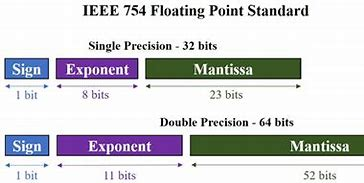  
- Primero colocamos el primer bit que hace referencia al signo del número, en este caso es negativo entonces colocamos el número $1$.Separamos la parte entera y decimal del número y los convertimos a binario.
- Para convertir la parte entera a binario: se divide el numero para dos ,si el residuo es igual o mayor a 5 se coloca 1 y se es menor a 5 se coloca 0,es decir la parte decimal del resultado es igual o mayor a 0.5 se coloca 1 y se es menor se coloca 0. 

- El procedimiento se realiza hasta que la parte entera del numero a dividir para 2 sea cero.hora se ordena los números obtenidos de abajo hacia arriba, realizando así la cadena de 0 y 1 que representa el numero en binario.

- Para convertir la parte decimal o binario: se debe multiplicar solo la parte decimal por dos, si la parte entera es 0 se registrara 0 y si es 1 se registrara 1 ,este procedimiento se repite hasta que la parte decimal sea igual a 0 o se tenga un ciclo en los resultados es decir un decimal periódico o cuando ya tenemos los datos suficientes que necesitamos.

- Para obtener la representación en binario de la parte decimal se debe ordenar de arriba hacia abajo la cadena de 0 y 1.Obteniendo así nuestra conversión. Entonces al unir la parte binaria del numero entero y el decimal se obtiene finalmente la representación del numero completo en forma binaria. 
- Ahora debemos obtener el exponente y la mantisa del formato IEEE754 de 32 o 64 bits. Para eso debemos pasar a notación científica nuestra expresión ,es decir debemos recorrer la coma hasta que, una sola cifra antes de la coma sea 1.
- Al tener el número en notación científica se suma 127 o 1024 al exponente y el resultado lo transformamos a binario ,el numero binario resultante es nuestro exponente de 8 o 11 bits en el formato IEEE754. Ahora convertimos a binario usando la técnica antes mencionada.- Ahora tomamos los dígitos que están después de la coma en la representación científica, ellos representan los 23 bits correspondientes de la mantisa. Estos se colocan en orden hasta llenar los 23 o 52 bits ,si el binario no llena todos los espacios ,estos se llenan con cero a excepción de los binarios que representas decimales periódicos. 
- Finalmente tomamos los bits tanto del signo como del exponente y de la mantisa y lo unimos ,consiguiendo así la representación de formato IEEE754 de 32 o 64 bits de nuestro número.
        

In [23]:
def converBina(num,parte,numdigit=None):
    if num == 0: #si el numero es cero
        return "0"
    binario = "" #inica el str para almacenar los bits
    if parte =='int': #si es la parte entera del numero
        i=0
        print(f"Numero = {num}")
        if numdigit !=None: #si hay parametro de num max de digitos
            while num > 0 and i <numdigit: #si el num es mayor a 0 y iteracion es menor que el num de digitos
                bit = str(num % 2)
                binario += bit #obtiene el residuo de la division del numero para 2 =(0,1) y suma a la cadena del binario
                num //= 2 #divide el num para dos
                print(f"{num} | {bit}")
                i += 1 #aumenta el num de iteracion
            return binario
        else:
            while num > 0: #si no hay parametro de num max de digitos solo revisa si el num es mayor a 0
                bit = str(num % 2)
                binario += bit #realiza lo explicado anterior mente
                num //= 2
                print(f"{num} | {bit}")
            return binario
    if parte =='dec': #si es la parte decimal del numero
        i=0
        if numdigit !=None: #verifica si hay parametro num max de digitos
            print(f"Decimal = {num}")
            while num > 0 and i < numdigit:
                num *= 2 #multiplica el num para dos
                bit = int(num) #obtiene solo la parte entera
                print(f"{num} | {bit}")
                binario += str(bit) #agrega a la cadena de bits
                num -= bit #resta la parte entera del numero
                i += 1 #agrega una iteracion
            return binario
        else:
            while num > 0 : #si no hay parametro de num max de digitos
                num *= 2
                bit = int(num)
                print(f"{num} | {bit}")
                binario += str(bit)
                num -= bit
            return binario

In [43]:

def converDeci(binario,parte):
    decimal=0
    strcadena=""
    if parte == 'int': #si el binario es de la parte entera
        potencia=0
        print(f"Binario entero = {binario}")
        for bit in reversed(binario): #voltea la lista y obtiene cada bit
            if bit == '1': #si el bit es 1
                strcadena += f"2 ** {potencia} + "
                decimal += 2 ** potencia #obtiene el resultado de base elevada a la posicion del bit
            potencia += 1 #aumenta el valor de la posicion
        print(f"Conversion = {strcadena} = {decimal}")
        return decimal
    elif parte == 'dec': #si el binario es de la parte decimal
        potencia=-1
        print(f"Binario decimal = {binario}")
        for bit in binario: #obtiene cada bit del num binario
            if bit == '1': #verifica si es 1
                strcadena += f"2 ** {potencia} + "
                decimal+=2 ** potencia #eleva a la posicion pero en negativo porq es decimal
            potencia-=1
        print(f"Conversion = {strcadena} = {decimal}")
        return decimal


In [44]:
def relleCero(aux,size,lado):  #funcion para rellanar con ceros tanto a izq como derecha 
    if lado =='der':            #en caso de que al exponente o a la mantiza les falta bits.
        if not len(aux)>=size:
            return aux+'0'*(size-len(aux))
    if lado =='izq':
        if not len(aux)>=size:
            return '0'*(size-len(aux))+aux

In [79]:

def converIEE(num,bits):
    signo = '0' 
    if num < 0: #obtiene el bit del signo
        signo = '1'
        num = -num
    parte_entera = int(num) #obtiene la parte entera del numero
    parte_decimal = num - parte_entera #obtiene la parte decimal del numero

    bin_entera = converBina(parte_entera,'int') #convertimos a binario
    
    if bits ==32: #obtiene el num max de digitos que debe tener el binario para rellenar la mantisa
        aux = 23-len(bin_entera)
    elif bits==64:
        aux = 52-len(bin_entera)
    
    bin_decimal = converBina(parte_decimal,'dec',aux) #convierte a binario
    print(f"Num Binario : {bin_entera},{bin_decimal}")
    if parte_entera != 0: #si parte entera no es 0
        exponente = len(bin_entera) - 1 #obtiene el exponente
        print(f"Exponente = {exponente}")
        mantisa = bin_entera[1:] + bin_decimal #une la parte de binario entero apartir del 1 uno y parte binaria decimal
        print(f"Mantisa = {mantisa}")
    else:
        primeruno = bin_decimal.find('1') + 1  #encuentra la posicion del primer 1
        exponente = -primeruno 
        print(f"Exponente = {exponente}")
        mantisa = bin_decimal[primeruno:] #obtiene la cadena apartir del primer uno
        print(f"Mantisa = {mantisa}")
    if bits == 32: #revisa si es representacion ieee 32 o 64 bits
        exponente+=127
        print(f"Exponente + 127 = {exponente}")
        exponente_bin = converBina(exponente,'int',8) #convierte el exponente a binario
        if not len(exponente_bin)==8:
            exponente_bin = relleCero(exponente_bin,8,'izq') #si no tiene 8 bits en total lo rellena con 0
        if not len(mantisa)==23:
            mantisa_bin = relleCero(mantisa,23,'der')  #si no tiene 23 bits en total lo rellena con 0
        print(f"Exponente Binario = {exponente_bin}")
        print(f"Mantisa Binario = {mantisa_bin}")
    elif bits ==64:
        exponente+=1023
        print(f"Exponente + 1023 = {exponente}")
        exponente_bin = converBina(exponente,'int',11) #convierte el exponente a binario
        if not len(exponente_bin)==11:
            exponente_bin = relleCero(exponente_bin,11,'izq') #si no tiene 11 bits en total lo rellena con 0
        if not len(mantisa)==52:
            mantisa_bin = relleCero(mantisa,52,'der') #si no tiene 52 bits en total lo rellena con 0
        print(f"Exponente Binario = {exponente_bin}")
        print(f"Mantisa Binario = {mantisa_bin}")
    ieee = signo + exponente_bin + mantisa_bin #crea la representacion
    return ieee

In [80]:
num = -6.75
print(f"Rpresentación Numerica IEEE del número :{num} : {converIEE(num,64)}")

Numero = 6
3 | 0
1 | 1
0 | 1
Decimal = 0.75
1.5 | 1
1.0 | 1
Num Binario : 011,11
Exponente = 2
Mantisa = 1111
Exponente + 1023 = 1025
Numero = 1025
512 | 1
256 | 0
128 | 0
64 | 0
32 | 0
16 | 0
8 | 0
4 | 0
2 | 0
1 | 0
0 | 1
Exponente Binario = 10000000001
Mantisa Binario = 1111000000000000000000000000000000000000000000000000
Rpresentación Numerica IEEE del número :-6.75 : 1100000000011111000000000000000000000000000000000000000000000000


Para convertir de binario a decimal
se tiene la siguiente formula:

$x = (-1)^{s} 2^{c-127} (1+f)$
- Donde S: signo (0 positivo, 1 negativo)
- c : exponente
- f: mantisa(fracción binaria)

In [47]:
def is_number(num): #verifica si es numero
    try:
        float(num)
        return True
    except ValueError:
        return False

In [75]:
def binario_decimal(s,auxc,auxf,tipo):
    if type(auxc) != int:
        c = int(converDeci(auxc,"int"))
    else:
        c = auxc
    if type(auxf) != float:
        f = float(converDeci(auxf,"dec"))
    else:
        f = auxf
    print(f)
    if tipo == 32:
        exp =127
    if tipo == 64:
        exp =1023
    return (-1)**s * 2**(c-exp) * (1+f)

In [77]:
signo = 0
exponente = "10000001"
mantisa = "10100000000000000000000"

print(f"Número convertido de binario a decimal: {binario_decimal(signo,exponente,mantisa,32)}")

Binario entero = 10000001
Conversion = 2 ** 0 + 2 ** 7 +  = 129
Binario decimal = 10100000000000000000000
Conversion = 2 ** -1 + 2 ** -3 +  = 0.625
0.625
Número convertido de binario a decimal: 6.5


## Aritmética de Computador

En computación es fundamental ya que las máquinas operan con un número finito de dígitos.  
Se representa en punto flotante.Incluido sus aperaciones como suma ,resta,multiplicación y división.

In [98]:
def repre_float(num,cifras=None,tipo=None): #convierte a punto flotante
    if cifras !=None:
        num = numcifras(num,cifras,tipo)
    if num == 0:
        return 0.0
    exponente=0
    while abs(num) >= 1:
        num /= 10
        exponente +=1
    while abs(num)<0.1:
        num*=10
        exponente-=1
    print(f"Numero = {num}*10^{exponente}")
    return num*10**exponente
def sumaAriCom(num1, num2,cifras=None,tipo=None): #suma en aritmética de computador
    suma = numcifras(num1 + num2,cifras,tipo)
    return repre_float(suma)

def restaAriCom(num1, num2,cifras=None,tipo=None): #resta en aritmética de computador
    resta = numcifras(num1 - num2,cifras,tipo)
    return repre_float(resta)

def multiplicacionAriCom(num1, num2,cifras=None,tipo=None): #multiplicación en aritmética de computador
    mult = numcifras(num1 * num2,cifras,tipo)
    return repre_float(mult)

def divisionAriCom(num1, num2,cifras=None,tipo=None): #división en aritmética de computador
    if num2 != 0:
        divis = numcifras(num1 / num2,cifras,tipo)
        return repre_float(divis)
    else:
        raise ValueError("La division para cero no esta definido")


In [ ]:
x = math.pi
y = math.sqrt(2)
z = 2/3
auxx =repre_float(x,3,[3,2])
auxy =repre_float(y,3,[3,2])
auxz =repre_float(z,3,[3,2])
opera= divisionAriCom(multiplicacionAriCom(sumaAriCom(auxx,auxz,3,[3,2]),auxy,3,[3,2]),restaAriCom(auxx,auxy,3,[3,2]))
errorRelativo((((x+z)*y)/(x-z)),opera,3,[3,2]) 

Numero = 0.314*10^1
Numero = 0.141*10^1
Numero = 0.667*10^0
Numero = 0.381*10^1
Numero = 0.537*10^1
Numero = 0.173*10^1
Numero = 0.31040462427745663*10^1
Num = 2.18 , Aprox = 3.1


0.422

In [111]:
#Datos en la clase restar x=5/7  y y=0.714251 y calcular el error relativo porcentual
#Usando redondeo a 5 digitos

num1 = 5/7
num2 = 0.714251
num1_redon = redondear(num1,5) #numero 1 redondeado
num2_redon = redondear(num2,5)  #numero 2 redondeado
print(f"Números redondeados a 5 cifras:\n Número 1:{num1_redon},  Número 2:{num2_redon}")

fl_num1_redon = repre_float(num1_redon)
fl_num2_redon = repre_float(num2_redon)

print(f"Números en punto flotante:\n Número 1:{fl_num1_redon},  Número 2:{fl_num2_redon}")
sumafl = sumaAriCom(fl_num1_redon,fl_num2_redon)
print(f"Suma Aritmética: {sumafl}")
restafl = restaAriCom(fl_num1_redon,fl_num2_redon)
print(f"Resta Aritmética: {restafl}")
multiplicacionfl =multiplicacionAriCom(fl_num1_redon,fl_num2_redon)
print(f"Multiplicación Aritmética: {multiplicacionfl}")
divisiónfl = divisionAriCom(fl_num1_redon,fl_num2_redon)
print(f"División Aritmética: {divisiónfl}")
restareal = num1-num2
print(f"Resta real: {restareal}")
print(f"Error Relativo Porcentaul: {errorRelativoPorcentual(restareal,restafl)}%")


Números redondeados a 5 cifras:
 Número 1:0.71429,  Número 2:0.71425
Números en punto flotante:
 Número 1:0.71429,  Número 2:0.71425
Suma Aritmética: 0.14285399999999998
Resta Aritmética: 3.999999999992898e-05
Multiplicación Aritmética: 0.5101816325
División Aritmética: 0.100005600280014
Resta real: 3.471428571433233e-05
Error Relativo Porcentaul: 15.22633744820037%


## Convergencia, Divergencia y Tolerancia

Convergencia: Los resultados se acercan cada vez mas a la solución al aumentar el numero de iteraciones.

Divergencia: Los resultados se alejan cada vez mas de la solución al aumentar el numero de iteraciones.

Tolerancia: Limite impuesto para detener el metodo cuando se llega una solución dentro de este limite.

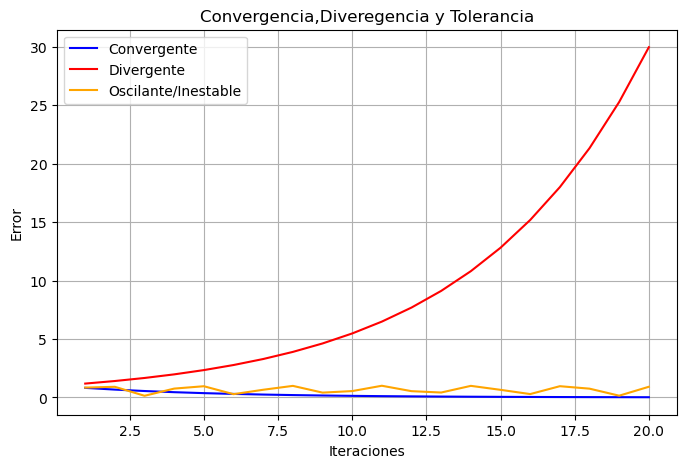

In [112]:


# valores de x sera el num de iteraciones
iteraciones = np.linspace(1, 20, 20)

# definimos las funciones que simulan los diferentes comportamientos 
def convergencia(x):
    return np.exp(-0.2 * x)
def divergencia(x):
    return np.exp(0.17 * x)
def oscilante(x):
    return np.abs(np.sin(x))

# valores de "y" segun el comportamiento
y_convergencia = convergencia(iteraciones)
y_divergencia = divergencia(iteraciones)
y_oscilante = oscilante(iteraciones)

# Dibujamos los diferentes funciones con sus valores x y y.
plt.figure(figsize=(8, 5))
plt.plot(iteraciones, y_convergencia, label="Convergente", color="blue")
plt.plot(iteraciones, y_divergencia, label="Divergente", color="red")
plt.plot(iteraciones, y_oscilante, label="Oscilante/Inestable", color="orange")

# Agregamos titulos y etiquetas de nuestros ejes a la grafica
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.title("Convergencia,Diveregencia y Tolerancia")
plt.legend()
plt.grid(True)


# Muestra la gráfica
plt.show()

## Criterios de parada

Se usan dentro de los algortimos para evitar lazos infinitos.  
Error absoluto ->  $|P_N - P_{N-1}| <error$  
Error relativo ->  $\frac{|P_N - P_{N-1}|}{|P_N|} <error$  
Valor de la función ->  $|f(P_N)| <error$  
Número de iteraciones ->  $i <K ,K $ es el número max de iteraciones  
Tiempo ->   $t < T[ms]$  

In [113]:

K = 4 #num max de iteraciones
aprox_resta = restaAriCom(fl_num1_redon,fl_num2_redon)
print(f"Valor de resta real:{restareal}")
for i in range(K): #Utilizamos el criterio de parada del num de iteraciones
    print(f"Valor de resta aproximada:{aprox_resta}")
    error = errorAbsoluto(restareal,aprox_resta)
    print(f"Valor del error: {error}")
    aprox_resta=aprox_resta-error #restamos el error para acercarnos mas a solución

Valor de resta real:3.471428571433233e-05
Valor de resta aproximada:3.999999999992898e-05
Valor del error: 5.285714285596654e-06
Valor de resta aproximada:3.471428571433233e-05
Valor del error: 0.0
Valor de resta aproximada:3.471428571433233e-05
Valor del error: 0.0
Valor de resta aproximada:3.471428571433233e-05
Valor del error: 0.0


# Unidad 2 - Soluciones de sistemas de euaciones no lineales Codificación #1

## Método de la Bisección

**Método de bisección**

En método de la bisección consiste en ir reduciendo el intervalo $[a~,~b]$  
hasta que eventualmente tenga una anchura muy pequeña donde contenga un cero es decir converga.  

El proceso para subdividir el intervalo consiste en tomar un punto medio $p = \frac{(a + b)}{2} $ 
donde posteriormente se analice las siguientes posibilidades:

- Si $f(a)$ y  $f(p)$ o $f(p)$ y $f(b)$  tiene 
    signos opuestos ,entonces hay un cero en [a,p] o [p,b] respectivamente.
- Si $f(p) = 0$, entonces c es un cero.

Entonces remplazamos nuestro intervalo con los criterios antes mencionados es decir
$[a,p]$ sera nuestro nuevo $[a,b]$ y repetimos el proceso nuevamente. 

**La convergencia del método de bisección** consiste en
mediante la sucesión de puntos medios de los diferentes intervalos creados por el 
método de bisección. encontremos un número $p\in ~[a~,~b]$ tal que $f(p) = 0$.


In [113]:
#function sigmu para obtener el signo de un numero
def signo(x):
    if x>0: #si es positivo
        return "+"
    elif x<0: #si es negativo
        return "-"
    else: #si es cero
        return "0"

In [140]:
def metodo_biseccion(funcion,a,b, tol, max_iter,cifras,tipo):
    #Realizamos el metodo mediante el pseudocódigo de la diapositiva
    #Metodo de bisección para encontrar raíces de una función
    #ENTRADA:
    #- a, b: puntos finales del intervalo
    #- tol: tolerancia
    #- iteraciones: número máximo de iteraciones
    #- funcion: función f(x)
    #SALIDA:
    #- solución aproximada p o mensaje de falla
    
    # Paso 1: Sea i = 1; FA = f(a) 
    i = 1
    fa = numcifras(funcion(a),cifras,tipo)
    fb = numcifras(funcion(b),cifras,tipo) #añadimos fb para tener una tabla con todos los valores en caso de b=n
    #Para ver mejor creamos una tabla como en la clase
    print("i\ta        \tb        \tp        \tf(a)\tf(b)\tf(p)\tTOL")
    print("-"*90)
    
    # Paso 2: Mientras i ≤ N0 haga los pasos 3-6
    while i <= max_iter:
        # Paso 3: Sea p = a + (b-a)/2; (Calcule p_i)
        #         FP = f(p)
        p = numcifras((b + a)/2,cifras,tipo)
        fp = numcifras(funcion(p),cifras,tipo)
        
        error = numcifras(abs((b-a))/2,cifras,tipo) #error de la iteracion
        # Paso 4: Si FP = 0 o (b-a)/2 < TOL entonces
        #         SALIDA (p); (Procedimiento completado exitosamente)
        #Rellenamos la tabla con los valores de la iteración
        print(f"{i}\t{a}       \t{b}        \t{p}       \t{signo(fa)}\t{signo(fb)}\t{signo(fp)}\t{error}")
        if tol != None:
            if fp == 0 or error < tol:
                return p
        # Paso 5: Sea i = i + 1
        i +=1
        # Paso 6: Si FA · FP > 0 entonces determine a = p; (Calcule a_i, b_i)
        if fa * fp > 0:
            a = p  # Cambia nuestro intervalo [a=p,b]
            fa = fp
        else:
            b = p 
            fb = fp    
    # Paso 7: SALIDA ('El método fracasó después de N0 iteraciones, N0 =', N0);
    #         (El procedimiento no fue exitoso)
    #         PARE
    print(f"El método fracasó después de {max_iter} iteraciones")
    return None


In [142]:
# Realizamos un ejemplo
def f(x):
    return x**3 + x -1
#llamamos al metodo
intervalo = [0,1]
tol=10**-3
max_iteraciones=20
cifras=7
tipo=[3,2]
print(f"\nen el intervalo [{intervalo[0]},{intervalo[1]}] ,con tolerancia: {tol}")
resultado = metodo_biseccion(f,intervalo[0],intervalo[1], tol,max_iteraciones,cifras,tipo)
#verificamos si obtuvimos un resultado
if resultado:
    print(f"\nNuestra solución: f({numcifras(resultado,cifras,tipo)}) = {numcifras(f(resultado),cifras,tipo)}")


en el intervalo [0,1] ,con tolerancia: 0.001
i	a        	b        	p        	f(a)	f(b)	f(p)	TOL
------------------------------------------------------------------------------------------
1	0       	1        	0.5       	-	+	-	0.5
2	0.5       	1        	0.75       	-	+	+	0.25
3	0.5       	0.75        	0.625       	-	+	-	0.125
4	0.625       	0.75        	0.6875       	-	+	+	0.0625
5	0.625       	0.6875        	0.65625       	-	+	-	0.03125
6	0.65625       	0.6875        	0.671875       	-	+	-	0.015625
7	0.671875       	0.6875        	0.6796875       	-	+	-	0.0078125
8	0.6796875       	0.6875        	0.6835938       	-	+	+	0.00390625
9	0.6796875       	0.6835938        	0.6816407       	-	+	-	0.00195315
10	0.6816407       	0.6835938        	0.6826173       	-	+	+	0.00097655

Nuestra solución: f(0.6826173) = 0.000694011


# Unidad 2 Soluciones de sistemas de ecuaciones no lineales Codificación #2

## Método del punto fijo

Se iguala nuestro $f(X) = 0$ y se despeja x  
,entonces obtenemos la transformación $x = g(x)$  
Se realiza las iteraciones hasta encontrar la raíz: aproximada $$x_{n+1} = g(x_n)$$
Su cálculo de error es:
$$e = \frac{|x_{n+1-x_n}|}{x_{n+1}}$$

In [164]:
def metodo_punto_fijo(funcion, x0, tol, max_iter,cifras=None,tipo=None):
    print("i\tX0     \t\tX1      \t\tError") #creamos la tabla para mejorar la organización de los datos
    print("-" * 50)

    i = 0 #numero de iteraciones 
    while i < max_iter: #verifica el num de iteraciones llevadas
        try:
            x1 = numcifras(funcion(x0),cifras,tipo) # x_n+1 = g(x_n)
        except ValueError as e: # control de errores por overflow o raices negativas
            print(f"Error en la función g(x): {e} ,en {i} iteraciones")
            return None 

        error = numcifras(abs((x1 - x0)/x1),cifras,tipo) #calcula el error |xi+1 - xi/ xi+1| 
        print(f"{i}\t{numcifras(x0,cifras,tipo)}       \t{numcifras(x1,cifras,tipo)}       \t{numcifras(error,cifras,tipo)}") #imprimimos nuestros datos obtenidos en la iteración i

        if tol != None:
            if error < tol: #verifica si nuestra solucion es aceptada 
                return x1 #retorna nuestra solución

        x0 = x1 #nuestro x_n+1 pasa a ser nuestro x_n
        i += 1 #aumenta el numero de iteraciones
    print(f"El método fracasó después de {max_iter} iteraciones")
    return None
    

In [405]:
# Realizamos un ejemplo
print("\nfuncion f(x) = 2e^{x^2}-5x")
#Igualamos a f(x)=0 y despejamos x ,ejm x = cos(x)+x
print("\nNuestro g(x) = 0.4e^{x^2}")
#x = g(x)
def g(x):
    return 0.4*math.e**(x**2)
x0 = 0  # Valor inicial
tol=0.01
max_iter=20
cifras=6
tipo=[2]
print(f"valor inicial X0: {x0}")
# llamamos al metodo
raiz_aprox = metodo_punto_fijo(g, x0, tol, max_iter,cifras,tipo)
#verificamos si obtuvimos un resultado
if raiz_aprox is not None:
    print(f"\nNuestro resultado es raíz: {numcifras(raiz_aprox,cifras,tipo)}")


funcion f(x) = 2e^{x^2}-5x

Nuestro g(x) = 0.4e^{x^2}
valor inicial X0: 0
i	X0     		X1      		Error
--------------------------------------------------
0	0       	0.4       	1.0
1	0.4       	0.469404       	0.147856
2	0.469404       	0.4986       	0.058556
3	0.4986       	0.512893       	0.027867
4	0.512893       	0.520362       	0.014353
5	0.520362       	0.524393       	0.007687

Nuestro resultado es raíz: 0.524393


# Método de Newton (Newton-Rapshon)

**Método de Newton-Raphson**  
Dado la función $f \in  C^{2}[a,b]$ donde existe un número $x \in [a,b]$ tal que $f(x) = 0$ y que $f'(x)\neq 0$ entonces la sucesión $\{x_k\}_{k=0}^{\infty}$ esta definida por la fórmula de iteración:
$$x_k = g(x_{k+1}) = x_{k+1} - \frac{f(x_{k+1})}{f'(x_{k+1}} ~~,n\geq 1$$ 
donde converge a $x$.

In [119]:
import sympy as sp
def derivada(funcstr,grado): #tiene como parametros la funcion en str y el grado de la deriva
    x = sp.Symbol('x') #define x
    f = sp.sympify(funcstr) #convierta a una funcion matematica
    derivada_simbo = f.diff(x,grado) #obtine la primera derivada
    derivada_num =  sp.lambdify(x, derivada_simbo, 'math') #comvierte a una funcion math
    return derivada_num #retorna la derivada en forma math

In [403]:

def metodo_newton_raphson(funcion, derivada, x0, tol,max_iter,cifras=None,tipo=None):
    print("i\tX0    \t\tX1    \t\tError")  #creamos la tabla para mejorar la organización de los datos
    print("-" * 50)

    i = 0 #numero de iteraciones

    while i < max_iter: #verifica que no sobrepase el numero de iteraciones
        
        fx0 = numcifras(funcion.subs(x,x0),cifras,tipo) #obtiene el valor de f(x) actual
        dfx0 = numcifras(derivada.subs(x,x0),cifras,tipo) #obtiene el valor de f'(x) actual

        if dfx0 == 0: #verifica el valor de f'(X) ya que la division para 0 no esta definida
            print("No se puede dividir f'(x) = 0")
            return None 

        x1 = numcifras(x0 - (fx0 / dfx0),cifras,tipo) #Metodo de Newton
        error = numcifras(errorRelativoPorcentual(x1,x0),cifras,tipo) #error |xi+1 - xi|

        print(f"{i}\t{x0}    \t{x1}    \t{error}") #Imprime los datos obtenidos en la iteracion

        if tol!=None:
            if error < tol: #si nuestro error es menor a la tolerancia
                return x1 #retorna la raiz

        x0 = x1
        i += 1
    print(f"El método fracasó después de {max_iter} iteraciones")
    return None    

In [404]:
# Realizamos un ejemplo
x = sp.symbols('x')
funcion = sp.ln(x) + x**2 - 4
df = sp.diff(funcion,x) #obtenemos la derivada de la f(x)
print(df)
x0 = 1.5  # Valor inicial
tol = 0.5 #tolerancia
max_iteraciones = 20 #numero max de iteraciones
cifras = 4
tipo = [2]
print(f"\nX0: {x0}, y tolerancia: {tol}")
    
raiz = metodo_newton_raphson(funcion, df, x0, tol, max_iteraciones,cifras,tipo) #llamamos al metodo de newton

if raiz is not None: #comprovamos que tenemos una raiz
    print(f"\nNuestro resultado es raíz:{numcifras(raiz,cifras,tipo)}")

2*x + 1/x

X0: 1.5, y tolerancia: 0.5
i	X0    		X1    		Error
--------------------------------------------------
0	1.5    	1.8667    	19.6443
1	1.8667    	1.8412    	1.385
2	1.8412    	1.8411    	0.0054

Nuestro resultado es raíz:1.8411


## Método de la secante

**Método de la secante**  
En término general la sucesión generada por este método esta definida por la fórmula de iteración de dos puntos:
$$x_{k+1} = g(x_k,x_{k+1})~=~ x_{k} - \frac{f(x_{k}) (x_k - x_{k-1})}{f(x_{k}) - f(x_{k-1})}$$
donde converge a $x$

In [400]:

def metodo_secante(f, x0, x1, tol, max_iter,cifras=None,tipo=None):
    print("i\t\tX0\t\tX1\t\tError") #creamos la tabla para mejorar la organización de los datos
    print("-" * 50)

    i = 0 #numero de iteraciones

    while i < max_iter: #verifica que no sobrepasemos el num de iteraciones
        fx0 = numcifras(f(x0),cifras,tipo) #valor de f(x0) actual
        fx1 = numcifras(f(x1),cifras,tipo) #valor de f(x1) actual
        if fx1 - fx0 == 0: #verifica que no sea cero para no tener error al dividir
            print("f(x1) -f(x0) =0 no se puede dividir para cero")
            return None
        x2 = numcifras(x1 - fx1 * ((x1 - x0)/ (fx1 - fx0)),cifras,tipo) #metodo de la secante
        error = numcifras(errorAbsoluto(x2,x1,cifras,tipo)) #calculamos el error |xi+1 - xi|
        print(f"{i}\t\t{x0}\t\t{x1}\t\t{error}") #imprimimos nuestros datos obtenidos en la iteracion
        if tol != None:
            if error < tol: #verifica si el error es menor que la tolerancia
                return x2  #retorna la raiz

        x0, x1 = x1, x2 #actualizamos nuestros x0,x1
        i += 1 #aumentamos el num de oteraciones una unidad
    print(f"El método fracasó después de {max_iter} iteraciones")
    return None 
    

In [401]:
# Realizamos un ejemplo

def f(x):
    return x**3 - 6*x**2 + 11*x -6
x0 = 2.5  # p_0 Valor inicial
x1 = 3.5  # p_1 Segundo valor inicial
tol = 0.001# tolerancia
max_iteraciones = 20 #numero maximo de iteraciones
cifras=4
tipo=[2] 
print(f"\nX0: {x0}  ,X1:{x1} y tolerancia: {tol}")
raiz = metodo_secante(f, numcifras(x0,cifras,tipo), numcifras(x1,cifras,tipo), tol, max_iteraciones,cifras,tipo) #llamamos al metodo de la secante
if raiz is not None: #verifica si obtuvimos la raiz
    print(f"\nNuestro resultado es raíz: {numcifras(raiz,cifras,tipo)}")


X0: 2.5  ,X1:3.5 y tolerancia: 0.001
i		X0		X1		Error
--------------------------------------------------
0		2.5		3.5		0.8333
1		3.5		2.6667		0.1375
2		2.6667		2.8042		0.4527
3		2.8042		3.2569		0.3257
4		3.2569		2.9312		0.0473
5		2.9312		2.9785		0.024
6		2.9785		3.0025		0.0026
7		3.0025		2.9999		0.0001

Nuestro resultado es raíz: 3.0


# Unidad 2 -Soluciones No lineales Codificación #3

## Método de Posición Falsa (RegulaFalsi)

**Método de Posición Falsa o régula falsi** 
La construcción del intervalo $[a_{n},b_{n}]$ en cada iteración con 
    aproximación al cero esta definida por:
    $$x_n = x_{n-1} - \frac{f(x_{n-1})~-~(x_{n-1} - x_{n-2})}{f(x_{n-1})~-~f(x_{n-2})}$$
    donde:
- Si $f(x_{n-2})$ y $f(x_n)$ tienen signos opuestos, entonces se recorta por la derecha.  
- Si $f(x_n)$ y $f(x_{n-1})$ tienen signos opuestos, entonces se recorta por la izquierda.  
Hasta obtener la respuesta definido por el criterio de parada

In [307]:
def metodo_posicion_falsa(f, x0, x1, tol, max_iter,cifras,tipo):
    print("i\tx0\t\tx1\t\tx2\t\tf(x0)\tf(x1)\tf(x2)\tError")
    print("-" * 90)
    x0=numcifras(x0,cifras,tipo)
    x1=numcifras(x1,cifras,tipo)
    fx0 = numcifras(f(x0),cifras,tipo) #valor de f(x0) 
    fx1 = numcifras(f(x1),cifras,tipo) #valor de f(x1)
    i = 0 #numero de iteraciones
    aux_x2 = x0 #variable para guardar el x2 de la anterior iteracion
    while i < max_iter: #verifica que no sobrepasemos el num de iteraciones
        if fx1 - fx0 == 0: #verifica que no sea cero para no tener error al dividir
            print("f(x1) -f(x0) =0 no se puede dividir para cero")
            return None
        x2 = numcifras(x1 - ((fx1 * (x1 - x0)) / (fx1 - fx0)),cifras,tipo) #metodo de la secante
        fx2 = numcifras(f(x2),cifras,tipo)
        error = numcifras(errorAbsoluto(x2,aux_x2),cifras,tipo) #calculamos el error |xi+1 - xi|
        print(f"{i}\t{x0}\t\t{x1}\t\t{x2}\t\t{signo(fx0)}\t{signo(fx1)}\t{signo(fx2)}\t{error}")
        if tol!=None:
            if error < tol: #verifica si el error es menor que la tolerancia
                return x2  #retorna la raiz
        
        if fx0*fx2 <0:
            x1 = x2
            fx1 = fx2
        else:
            x0 = x2
            fx0 = fx2
        aux_x2 = x2
             #actualizamos nuestros x0,x1 con nuestro p=x2
        i += 1 #aumentamos el num de oteraciones una unidad
    print(f"El método fracasó después de {max_iter} iteraciones")
    return None 

In [309]:
# Realizamos un ejemplo

def f(x):
    return math.e**(-0.2*x)-0.5
    
x0 = 2  # p_0 Valor inicial
x1 = 5 # p_1 Segundo valor inicial
tol = 0.00001 # tolerancia
max_iteraciones = 20 #numero maximo de iteraciones
cifras=4
tipo=[2]
print(f"\nX0: {x0}  ,X1:{x1} y tolerancia: {tol}")
raiz = metodo_posicion_falsa(f, x0, x1, tol, max_iteraciones,cifras,tipo) #llamamos al metodo de la secante
if raiz is not None: #verifica si obtuvimos la raiz
    print(f"\nNuestro resultado es raíz: {numcifras(raiz,cifras,tipo)}")


X0: 2  ,X1:5 y tolerancia: 1e-05
i	x0		x1		x2		f(x0)	f(x1)	f(x2)	Error
------------------------------------------------------------------------------------------
0	2.0		5.0		3.69		+	-	-	1.69
1	2.0		3.69		3.4982		+	-	-	0.1918
2	2.0		3.4982		3.4714		+	-	-	0.0268
3	2.0		3.4714		3.4671		+	-	0	0.0043
4	3.4671		3.4714		3.4671		0	-	0	0

Nuestro resultado es raíz: 3.4671


# Unidad 3 -Ajustes de Curvas y Interpolación Codificación #1

## Polinomio de Taylor

**Polinomios de Taylor**  
Dado $f\in C^{n}[a,b]$ y un punto $x_0 \in [a,b]$.Si   $x \in [a,b]$,entonces  
$$f(x) = P_n (x) + R_n (x)$$   
$PN(x)$ es un polinomio aproximado a $f(x)$  
$$f(x) \approx P_n (x) = \sum_{k=0}^{n} \frac{f^{k}(x_0)}{k!} (x-x_0)^k $$  
definido como polinomio de Taylor de grado n de $f$ alrededor de $x_0$ y 
el término del error de truncamiento $R_n (X)$ es:   
$$R_n (x) = \frac{f^{n+1}ξ(x)}{(n+1)!} (x-x_0)^{n+1}$$ 
,ξ(x) es una funcion de x, con valor dentro $x$ y $x_0$.

In [397]:
def polinomio_taylor(f, a, grado, cifras=None,tipo=None,x0=None):
    
    taylor_expr = 0
    strexpr = f"P_{grado}(x) = "
    for n in range(grado + 1):
        derivada = f.diff(x, n)
        deriv_val = numcifras(derivada.subs(x, a),cifras,tipo)
        print(f"f**{n}= {derivada} = {deriv_val}")
        factorial_n = sp.factorial(n)
        coef = numcifras(deriv_val / factorial_n,cifras,tipo)
        strexpr+=f"+ ({deriv_val}/ {n}!) "
        base = (x - a)**n if a != 0 else x**n
        strexpr+=f"*({base}) "
        taylor_expr += coef * base
    print(strexpr)
    print(f"P_{grado}(x) ≈ ",taylor_expr)
    taylor_expr = sp.expand(taylor_expr)
    print(f"P_{grado}(x) ≈ ",taylor_expr)
    taylor_expr = sp.collect(taylor_expr, x)
    print(f"P_{grado}(x) ≈ ",taylor_expr)
    ext_poli = sp.Poly(taylor_expr, x)
    taylor_expr = ext_poli.as_expr()
    Pn_str = str(taylor_expr)
    print(f"P_{grado}(x) ≈ ",Pn_str)
    if x0 !=None:
        aprox = f"P(x) evaluado en {x0}:\n"
        aprox+= f"{numcifras(taylor_expr.subs(x,x0),cifras,tipo)}"

    n_plus_1 = grado + 1
    factorial_np1 = sp.factorial(n_plus_1)
    inv_fact = numcifras(1 / float(factorial_np1), cifras,tipo)
    inv_fact = sp.Float(inv_fact, cifras)
    base_error = sp.expand((x - a)**n_plus_1)
    base_error_str = str(base_error)
    E = sp.symbols("ξ(x)")
    derivada = f.diff(x, n+1)
    auxE =derivada.subs(x,E)
    print(f"R_{grado}(x) = ({inv_fact}* f^({n_plus_1})(ξ(x)) )*({(x - a)**n_plus_1})")
    Rn_str = f"( {inv_fact}* {auxE} )*({base_error_str})"
    print(f"R_n(x) ≈ {Rn_str}")
    if x0 !=None:
        print(aprox)
    return f"f(x) ≈ {Pn_str} + {Rn_str}"


In [398]:
x = sp.symbols("x")
f = 100 - 4.9*x**2
a = 2
x0 = 2.1
grado = 5
cifras=4
tipo=[2]
print(polinomio_taylor(f, a, grado, cifras,tipo,x0=x0))


f**0= 100 - 4.9*x**2 = 80.4
f**1= -9.8*x = -19.6
f**2= -9.80000000000000 = -9.8
f**3= 0 = 0
f**4= 0 = 0
f**5= 0 = 0
P_5(x) = + (80.4/ 0!) *(1) + (-19.6/ 1!) *(x - 2) + (-9.8/ 2!) *((x - 2)**2) + (0/ 3!) *((x - 2)**3) + (0/ 4!) *((x - 2)**4) + (0/ 5!) *((x - 2)**5) 
P_5(x) ≈  -19.6*x - 4.9*(x - 2)**2 + 119.6
P_5(x) ≈  100.0 - 4.9*x**2
P_5(x) ≈  100.0 - 4.9*x**2
P_5(x) ≈  100.0 - 4.9*x**2
R_5(x) = (0.001400* f^(6)(ξ(x)) )*((x - 2)**6)
R_n(x) ≈ ( 0.001400* 0 )*(x**6 - 12*x**5 + 60*x**4 - 160*x**3 + 240*x**2 - 192*x + 64)
P(x) evaluado en 2.1:
78.391
f(x) ≈ 100.0 - 4.9*x**2 + ( 0.001400* 0 )*(x**6 - 12*x**5 + 60*x**4 - 160*x**3 + 240*x**2 - 192*x + 64)


## Series de Maclaurin

Es una serie de Taylor cuando $x_0 = 0$  
Precisión alta cerca de $x_0 =0$, pero decrece lejos de él  
No se usa en iterpolación  

In [399]:
x = sp.symbols("x")
f = sp.sqrt(1+x)
a = 1
x0 = None
grado = 4
cifras=4
tipo=[2]
print(polinomio_taylor(f, a, grado, cifras,tipo,x0=x0))

f**0= sqrt(x + 1) = 1.4142
f**1= 1/(2*sqrt(x + 1)) = 0.3536
f**2= -1/(4*(x + 1)**(3/2)) = -0.0884
f**3= 3/(8*(x + 1)**(5/2)) = 0.0663
f**4= -15/(16*(x + 1)**(7/2)) = -0.0829
P_4(x) = + (1.4142/ 0!) *(1) + (0.3536/ 1!) *(x - 1) + (-0.0884/ 2!) *((x - 1)**2) + (0.0663/ 3!) *((x - 1)**3) + (-0.0829/ 4!) *((x - 1)**4) 
P_4(x) ≈  0.3536*x - 0.0035*(x - 1)**4 + 0.011*(x - 1)**3 - 0.0442*(x - 1)**2 + 1.0606
P_4(x) ≈  -0.0035*x**4 + 0.025*x**3 - 0.0982*x**2 + 0.489*x + 1.0019
P_4(x) ≈  -0.0035*x**4 + 0.025*x**3 - 0.0982*x**2 + 0.489*x + 1.0019
P_4(x) ≈  -0.0035*x**4 + 0.025*x**3 - 0.0982*x**2 + 0.489*x + 1.0019
R_4(x) = (0.008300* f^(5)(ξ(x)) )*((x - 1)**5)
R_n(x) ≈ ( 0.008300* 105/(32*(ξ(x) + 1)**(9/2)) )*(x**5 - 5*x**4 + 10*x**3 - 10*x**2 + 5*x - 1)
f(x) ≈ -0.0035*x**4 + 0.025*x**3 - 0.0982*x**2 + 0.489*x + 1.0019 + ( 0.008300* 105/(32*(ξ(x) + 1)**(9/2)) )*(x**5 - 5*x**4 + 10*x**3 - 10*x**2 + 5*x - 1)


## Polinomio de Lagrange

**Polinomio de Lagrange**  
Dado $f\in C^{n+1}[a,b]$ y que pase por $n+1$ puntos $x_0,x_1,..,x_n \in [a,b]$.Si $x \in [a,b]$,entonces  
$$f(x) = P_n (x) + R_n (x)$$ 
$P_n (x)$ es un polinomio aproximado a $f(x)$  
$$f(x) \approx P_n (x) = \sum_{k=0}^{n} f(x_k) L_{n,k}(x) ,$$
donde $L_{n,k}(X)$ es el polinomio coeficiente de    Lagrange para los nodos $x_n$
$$L_{n,k}(x) = \prod_{j=0,j\neq k}^{n} \frac{(x-xj)}{(x_k - x_j)} $$
definido como polinomio de Lagrange de grado n de $f$   para los nodos dados y 
el término del error $R_n (X)$ es:  
$$R_n (x) = \frac{(x-x_0)..(x-x_n)f^{n+1}(ξ(x))}{(n+1)!},$$  
,ξ(x) es una funcion de x, con valor dentro $x$ y $x_0$.

In [437]:
def polinomio_lagrange(puntos,cifras=None,tipo=None,xi=None):
    
    x = sp.Symbol('x')
    n = len(puntos) - 1  # Grado del polinomio 
    
    x_vals = [numcifras(punto[0],cifras,tipo) for punto in puntos]  # Extraemos x y y de los puntos
    y_vals = [numcifras(punto[1],cifras,tipo) for punto in puntos]
    
    P_x = 0 # Initanciamos el polinomio
    
    print(f"Calculando polinomio de Lagrange para {len(puntos)} puntos:")
    print(f"Puntos: {puntos}")
    print(f"Grado del polinomio: {n}")
    print()
    Exp3_aux =["Termino: ",""]
    # Calcular cada término L_k(x)
    for k in range(len(puntos)):
        numerador = 1 #  instancias parte numerador/denominador de L_k(x)
        denominador = 1
        Exp_aux =["",""]
        Exp2_aux =["",""]
        
        for i in range(len(puntos)):
            if i != k:  # Se excluye cuando el punto xk = xj
                Exp_aux[0]+=f" (x - x{i}) "
                Exp_aux[1]+=f" (x{k} - x{i}) "
                Exp2_aux[0]+=f" (x - {numcifras(x_vals[i],cifras,tipo)})"
                Exp2_aux[1]+=f" ({numcifras(x_vals[k],cifras,tipo)} - {numcifras(x_vals[i],cifras,tipo)})"
                numerador *= (x - x_vals[i])
                denominador *= numcifras((x_vals[k] - x_vals[i]),cifras,tipo)
        L_k = numerador / denominador  # multiplicamos las fracciones obtinidas y expandimos
        print(f"L_{k}(x) = {Exp_aux[0]}/{Exp_aux[1]}")
        print(f"L_{k}(x) = {Exp2_aux[0]}/{Exp2_aux[1]}")
        print(f"L_{k}(x) = {L_k}")
        L_k = sp.expand(L_k)
        print(f"L_{k}(x) = {L_k}")

        termino = y_vals[k] * L_k # multiplicamos y_k * L_k(x)
        P_x += termino #añadimos al polinomio
        
        Exp3_aux[0]+= f"{y_vals[k]} * L_{k}(x) +"
        Exp3_aux[1]+=f"{sp.expand(termino)} + "
    print(Exp3_aux[0])
    print(Exp3_aux[1])
    print("Polinomio de Lagrange:")
    print(f"P(x) ≈ {P_x}")
    # Expandimos y simplificamos el polinomio final
    P_x = sp.expand(P_x)
    print(f"P(x) ≈ {P_x}")
    P_x = sp.collect(P_x, x)
    print(f"P(x) ≈ {P_x}")
    if xi!=None:
        aux_P_x = numcifras(P_x.subs(x,xi),cifras,tipo)
    strP_x = str(P_x)
    factorial_np1 = sp.factorial(n + 1) #calculamos el factorial
    inv_fact = numcifras((1 / (factorial_np1)),cifras,tipo)
    
    producto = 1
    for x_i in x_vals:
        producto *= (x - x_i) # Calcularmos (x - x_0)(x - x_1)...(x - x_n)
    
    producto = sp.expand(producto) #expandimos la expresion
    producto_str = str(producto) #convertimos a string
    
    # Construirmos la expresión del error
    Rn_str = f"( {inv_fact}*f^({n+1})(ξ(x)) )*({producto_str})"

    print("Error en polinomio de lagrange:")
    print(f"R_n(x) ≈ {Rn_str}")
    
    print("\nf(X):P(x)+Rn(x)")
    print(f"f(x) ≈ {strP_x} + {Rn_str}")
    if xi!=None:
        print(f"Polinomio estimado en {xi}: {aux_P_x}")
    return P_x


In [440]:

# Realizamos un ejemplo
# puntos (1,1), (2,2), (3,3)
puntos = [(0,0),(1, 18),(2, 32),(3, 42)]
cifras=4
tipo=[2]
x = 2.5
polinomio_lagrange(puntos=puntos,cifras=cifras,tipo=tipo,xi=x)



Calculando polinomio de Lagrange para 4 puntos:
Puntos: [(0, 0), (1, 18), (2, 32), (3, 42)]
Grado del polinomio: 3

L_0(x) =  (x - x1)  (x - x2)  (x - x3) / (x0 - x1)  (x0 - x2)  (x0 - x3) 
L_0(x) =  (x - 1.0) (x - 2.0) (x - 3.0)/ (0 - 1.0) (0 - 2.0) (0 - 3.0)
L_0(x) = -0.166666666666667*(x - 3.0)*(x - 2.0)*(x - 1.0)
L_0(x) = -0.166666666666667*x**3 + 1.0*x**2 - 1.83333333333333*x + 1.0
L_1(x) =  (x - x0)  (x - x2)  (x - x3) / (x1 - x0)  (x1 - x2)  (x1 - x3) 
L_1(x) =  (x - 0) (x - 2.0) (x - 3.0)/ (1.0 - 0) (1.0 - 2.0) (1.0 - 3.0)
L_1(x) = 0.5*x*(x - 3.0)*(x - 2.0)
L_1(x) = 0.5*x**3 - 2.5*x**2 + 3.0*x
L_2(x) =  (x - x0)  (x - x1)  (x - x3) / (x2 - x0)  (x2 - x1)  (x2 - x3) 
L_2(x) =  (x - 0) (x - 1.0) (x - 3.0)/ (2.0 - 0) (2.0 - 1.0) (2.0 - 3.0)
L_2(x) = -0.5*x*(x - 3.0)*(x - 1.0)
L_2(x) = -0.5*x**3 + 2.0*x**2 - 1.5*x
L_3(x) =  (x - x0)  (x - x1)  (x - x2) / (x3 - x0)  (x3 - x1)  (x3 - x2) 
L_3(x) =  (x - 0) (x - 1.0) (x - 2.0)/ (3.0 - 0) (3.0 - 1.0) (3.0 - 2.0)
L_3(x) = 0.166666666666

-2.0*x**2 + 20.0*x

In [691]:
def imprimir_matriz(matriz,cifras=None,tipo=None):
    n = matriz.rows
    m = matriz.cols
    for i in range(n):
        for j in range(m):
            print(f"{numcifras(matriz[i,j],cifras,tipo)}",end="\t\t")
        print()

In [798]:
def sustitucion_delante(matriz,b,cifras=None,tipo=None):
    n = matriz.rows
    x = [0]*n
    for i in range(n):
        suma = numcifras((sum(numcifras((matriz[i, j] * x[j]), cifras, tipo) for j in range(i))), cifras, tipo)
        x[i] = numcifras(((numcifras((matriz[i, -1] - suma), cifras, tipo)) / numcifras((matriz[i, i]), cifras, tipo)), cifras, tipo)
    return x

def sustitucion_atras(matriz,cifras=None,tipo=None):
    n = matriz.rows
    x = [0]*n
    for i in range(n-1,-1,-1):
        suma = numcifras((sum(numcifras((matriz[i, j] * x[j]),cifras,tipo) for j in range(i + 1, n))),cifras,tipo)
        x[i] = numcifras(((numcifras((matriz[i, -1] - suma),cifras,tipo)) / numcifras((matriz[i, i]),cifras,tipo)),cifras,tipo)
    return x

In [799]:
def eliminacion_gaussiana(matriz,cifras=None,tipo=None):
    n = matriz.rows #numero de filas
    c = matriz.cols
    for i in range(n): #convierte toda la matriz con presicion de 32 bits
        for j in range(c):
            matriz[i, j] = numcifras(float(matriz[i,j]),cifras,tipo)
    for i in range(n):
        # busca el pivote distinto de cero
        pivote = None
        for p in range(i, n):
            #print("fila=",p,"columna =",i)
            if matriz[p, i] != 0:
                pivote = p
                print("pivote =",numcifras(matriz[p,i],cifras,tipo))
                break
            
        if pivote is None:
            print("no existe una solución única")
            raise ValueError("no existe una solución única")

        # intercambia las filas, para poder eliminar en forma descendente con el pivote
        if pivote != i:
            print(f"Intercabio de filas {i+1}<->{pivote+1}")
            #cambio de filas, fila pivote<->fila i
            aux = matriz[i,:]
            matriz[i,:] = matriz[pivote,:]
            matriz[pivote,:] = aux
            imprimir_matriz(matriz,cifras,tipo)

        # convierte a 0 los numeros debajo del pivote
        for j in range(i + 1, n):
            m = numcifras((matriz[j, i]),cifras,tipo)/numcifras((matriz[i, i]),cifras,tipo)
            if m != 0: 
                print(f"{-1*m}*fila{i+1}+fila{j+1}")
                for k in range(n+1):
                    matriz[j, k] = numcifras(float(matriz[j, k] - m*matriz[i, k]),cifras,tipo)
                imprimir_matriz(matriz,cifras,tipo)
            
    # verifica las soluciones
    if matriz[n-1, n-1] == 0:
        raise ValueError("no existe una solución única")

    # obtiene los valores de las variables
    # sustitución hacia atrás
    x = sustitucion_atras(matriz,cifras,tipo)
    return x

# Unidad 3 - Splines Cúbicos Codificaión #2

### Splines Cúbicos en Interpolación

***Definición de Splines Cúbicos***
Dado un conjunto de puntos ${ x_0, y_0, x_1, y_1, x_2, y_2, \dots, x_n, y_n }$ de la función $ f(x) $ en el intervalo $[a, b]$:

- $ a = x_0 < x_1 < \dots < x_n = b $ (ordenados)
- $ S(x) $ es un spline cúbico, definido como:
  
$$
  S_j(x) = a_j + b_j (x - x_j) + c_j (x - x_j)^2 + d_j (x - x_j)^3
$$


  
- $S_j(x) $ es un polinomio de tercer grado en $[x_j, x_{j+1}]$, con $ j = 0,1,\dots,n-1 $.

***Propiedades de los Splines Cúbicos***
- Cada polinomio $S_j(x)$ **coincide con los puntos dados**:
  

$$
  S_j(x_j) = y_j, \quad S_j(x_{j+1}) = y_{j+1}
  $$


  
- Los polinomios **se intersecan en los puntos**:
  

$$
  S_j(x_{j+1}) = S_{j+1}(x_{j+1})
$$



- La **derivada primera y segunda** coinciden entre polinomios contiguos:
  

$$
  S'_j(x_{j+1}) = S'_{j+1}(x_{j+1}), \quad S''_j(x_{j+1}) = S''_{j+1}(x_{j+1})
  $$



 ***Condiciones de Frontera***
- **Spline cúbico natural**:  
  

$$
  S''_0(x_0) = S''_{n-1}(x_n) = 0
$$



- **Spline cúbico condicionado**:  
  Se agregan dos condiciones adicionales ${B_0 , B_n}$:
  

$$
  S'_0(x_0) = g'(x_0), \quad S'_{n-1}(x_n) = f'(x_n)
  $$




In [800]:

def metodo_spline_cubicos(puntos, B0aux=None, Bnaux=None,cifras=None,tipo=None,xi=None):
    x = sp.Symbol('x')
    n = len(puntos) - 1  # numero de intervalos
    
    x_valor = [punto[0] for punto in puntos] # Extraemos los valores x y y
    y_valor = [punto[1] for punto in puntos]
    
    a = [sp.Symbol(f'a_{i}') for i in range(n)]  # Crearamos las 4 incognitas a,b,c,d del sistema
    b = [sp.Symbol(f'b_{i}') for i in range(n)]
    c = [sp.Symbol(f'c_{i}') for i in range(n)]
    d = [sp.Symbol(f'd_{i}') for i in range(n)]
    
    print("Forma general de los splines:") 
    for j in range(n):
        print(f"S_{j}(x) = a_{j} + b_{j}*(x - {x_valor[j]}) + c_{j}*(x - {x_valor[j]})^2 + d_{j}*(x - {x_valor[j]})^3")
        print(f"         para x ∈ [{x_valor[j]}, {x_valor[j+1]}]")
    print()
    
    ecuaciones = [] #creamos una lista para guardar nuestras ecuaciones
    
    #obtenemos las ecuaciones mediante los splines
    for j in range(n):
        # Sj(xj) = yj
        print(f"S{j}(x{j}) = y{j} = {y_valor[j]}")
        print(f"->Eq1.{j} = S{j}(x{j}) = a{j} = {y_valor[j]}")
        eq = a[j] - y_valor[j] #se define la ecuacion por defecto
        ecuaciones.append(sp.Eq(eq,0))
        # Sj(xj+1) = yj+1 
        print(f"S{j}(x{j+1}) = y{j+1} = {y_valor[j+1]}")
        aux = x_valor[j+1] - x_valor[j]
        print(f"S{j}(x{j+1}) = a{j}+ b{j}(x{j+1}-x{j})+ c{j}(x{j+1}-x{j})**2+d{j}(x{j+1}-x{j})**3") 
        print(f"S{j}(x{j+1}) = {a[j]}+ {b[j]}({x_valor[j+1]}-{x_valor[j]})+ {c[j]}({x_valor[j+1]}-{x_valor[j]})**2+ {d[j]}({x_valor[j+1]}-{x_valor[j]})**3")
        eq = a[j] + b[j]*aux + c[j]*aux**2 + d[j]*aux**3 - y_valor[j+1] #se define la segunda ecuacion por defecto
        print(f"->Eq2.{j} = S{j}(x{j+1}) = {eq}")
        ecuaciones.append(sp.Eq(eq,0))
    
    #  ecuaciones de continuidad de primera derivada
    for j in range(n-1):
        print("Continuidad de la primera derivada:")
        print(f"S{j}'(x{j+1}) = S{j+1}'(x{j+1})")
        print(f"b{j}+ 2*c{j}(x{j+1}-x{j})+ 3*d{j}(x{j+1}-x{j})**2 = b{j+1}") 
        print(f"{b[j]}+ 2*{c[j]}({x_valor[j+1]}-{x_valor[j]})+ 3*{d[j]}({x_valor[j+1]}-{x_valor[j]})**2 = {b[j+1]}") 
        aux = x_valor[j+1] - x_valor[j]
        #S'j(x)=bj+2cj(x-xj)+3d(x-xj)^2
        eq = b[j] + 2*c[j]*aux + 3*d[j]*aux**2 - b[j+1]
        print(f"->Eq3.{j} = {eq}")
        ecuaciones.append(sp.Eq(eq,0))

    #ecuaciones de continuidad en la segunda derivada
    for j in range(n-1):
        print("Continuidad de la segunda derivada:")
        print(f"S{j}''(x{j+1}) = S{j+1}''(x{j+1})")
        print(f"2*c{j}+ 6*d{j}*(x{j+1}-x{j}) = 2c{j+1}") 
        print(f"2*{c[j]}+ 6*{d[j]}({x_valor[j+1]}-{x_valor[j]}) = 2{c[j+1]}") 
        aux = x_valor[j+1] - x_valor[j]
        #S''j(x)=2cj+6d(x-xj)
        eq = 2*c[j] + 6*d[j]*aux - 2*c[j+1]
        ecuaciones.append(sp.Eq(eq,0))
        print(f"->Eq4.{j} = {eq}")
    #para no repetir codigo se seleciona el tipo de las ultimas ecuaciones
    
    ecuaciones_natural = ecuaciones.copy()
    print("Condiciones de frontera Natural:")
    # S''0(x0) = 2*c0 = 0 ecuacion por defecto
    print(f"S{0}''(x0) = S{n-1}''(x{n}) = 0")
    print(f"2*c0 +6*d0*(x0-x0) = 2c{n-1}+6d{n-1}*(x{n}-x{n-1})") 
    print(f"2*{c[0]} = 2*{c[n-1]}+ 6{d[n-1]}*({x_valor[n]-x_valor[n-1]}) = 0") 
    eq1 = 2*c[0]
    ecuaciones_natural.append(sp.Eq(eq1,0))
    print(f"->Eq5.a = {eq1} ")
    # S''n-1(xn) = 2*cn-1 + 6*dn-1*(xn-xn-1) = 0 ecuacion por defecto
    aux2 = x_valor[n] - x_valor[n-1]
    eq2 = 2*c[n-1] + 6*d[n-1]*aux2
    ecuaciones_natural.append(sp.Eq(eq2,0))
    print(f"->Eq6.a = {eq2}")

    if B0aux!=None and Bnaux!=None:
        ecuaciones_condicionada = ecuaciones.copy()
        # ecuaciones de frontera condicionada
        print("Condiciones de frontera condicionada:")
        # S'0(x0) = B0
        print(f"S{0}'(x0) =f'(x0) = B0, S{n-1}'(x{n}) = f'(n) = Bn")
        print(f"S{0}'(x0) =b0 =B0") 
        print(f"S{n-1}'(x{n}) =b{n-1} + 2c{n-1}*({x_valor[n]-x_valor[n-1]})+ 3d{n-1}*({x_valor[n]-x_valor[n-1]})**2") 
        eq1 = b[0] - B0aux #ecuacion por defecto
        ecuaciones_condicionada.append(sp.Eq(eq1,0))
        print(f"->Eq5.b = {eq1}")
        # S'n-1(xn) = Bn #ecuacion por defecto
        aux2 = x_valor[n] - x_valor[n-1]
        eq2 = b[n-1] + 2*c[n-1]*aux2 + 3*d[n-1]*aux2**2 - Bnaux
        print(f"->Eq6.b = {eq2}")
        ecuaciones_condicionada.append(sp.Eq(eq2,0))
    
     #se establece un formato para remplazar

    auxCalculo=1
    if B0aux!=None and Bnaux!=None:
        auxCalculo = 2
    for h in range(auxCalculo):
        variables = []
        if h==0:
            print("Spline Cubico Natural")
            for i in range(n):
                variables.extend([a[i],b[i],c[i],d[i]])
            matrizspinesANatural, matrizspinesBNatural = sp.linear_eq_to_matrix(ecuaciones_natural,variables)
            matrizspinesNatural = matrizspinesANatural.row_join(-1*matrizspinesBNatural)
            imprimir_matriz(matrizspinesANatural,cifras,tipo)
            variables = eliminacion_gaussiana(matrizspinesNatural,cifras,tipo)
        if h==1:
            print("Spline Cubico Condicionado")
            for i in range(n):
                variables.extend([a[i],b[i],c[i],d[i]])
            matrizspinesACondicionada, matrizspinesBCondicionada = sp.linear_eq_to_matrix(ecuaciones_condicionada,variables)
            matrizspinesCondicionada = matrizspinesACondicionada.row_join(-1*matrizspinesBCondicionada)
            imprimir_matriz(matrizspinesACondicionada,cifras,tipo)
            variables = eliminacion_gaussiana(matrizspinesCondicionada,cifras,tipo)
            
        splines = [] #se construye una lista para almacenar nuestros splines
        for i in range(n):
            a_val = variables[i] #se obtiene el valor de aj,bj,cj,dj
            print(f"a{i} = {numcifras(variables[i],cifras,tipo)}")
            print(f"b{i} = {numcifras(variables[i+n],cifras,tipo)}")
            print(f"c{i} = {numcifras(variables[i+2*n],cifras,tipo)}")
            print(f"d{i} = {numcifras(variables[i+3*n],cifras,tipo)}")
        for j in range(0,n):
            a_val = variables[j] #se obtiene el valor de aj,bj,cj,dj
            b_val = variables[j+n]
            c_val = variables[j+2*n]
            d_val = variables[j+3*n]
            
            # Sj(x) = aj + bj*(x-xj) + cj*(x-xj)^2 + dj*(x-xj)^3 #se remplaza en la formula general de los splines
            spline = a_val + b_val*(x - x_valor[j]) + c_val*(x - x_valor[j])**2 + d_val*(x - x_valor[j])**3
            spline = sp.expand(spline) #se expande y se simplifica la expresion
            spline = sp.collect(spline, x)
            
            intervalo = f"[{x_valor[j]}, {x_valor[j+1]}]" #se agrega el interbalo del spline
            splines.append((str(spline), intervalo))
            
            print(f"S_{j}(x) = {spline}") #se imprime el spline
            print(f"         para x ∈ {intervalo}")
            print()
        if xi !=None:
            for j in range(n):
                if xi>= x_valor[j] and xi<=x_valor[j+1]:
                    return splines[j].subs(x,xi)
                else:
                    print("No pertenece al intervalo")

    return splines

In [801]:
#ejemplo
puntos = [(-1, 2), (0,0), (1, 2)]
#B0 = f'(x0)
B0aux = 0
#Bn = f'(xn)
Bnaux = 1
xi = None
cifras= 4
tipo=[2]
print(f"Puntos: {puntos}")
print(f"Número de splines necesarios: {len(puntos)-1}")
splines = metodo_spline_cubicos(puntos=puntos,B0aux=B0aux,Bnaux=Bnaux,cifras=cifras,tipo=tipo,xi=xi)


Puntos: [(-1, 2), (0, 0), (1, 2)]
Número de splines necesarios: 2
Forma general de los splines:
S_0(x) = a_0 + b_0*(x - -1) + c_0*(x - -1)^2 + d_0*(x - -1)^3
         para x ∈ [-1, 0]
S_1(x) = a_1 + b_1*(x - 0) + c_1*(x - 0)^2 + d_1*(x - 0)^3
         para x ∈ [0, 1]

S0(x0) = y0 = 2
->Eq1.0 = S0(x0) = a0 = 2
S0(x1) = y1 = 0
S0(x1) = a0+ b0(x1-x0)+ c0(x1-x0)**2+d0(x1-x0)**3
S0(x1) = a_0+ b_0(0--1)+ c_0(0--1)**2+ d_0(0--1)**3
->Eq2.0 = S0(x1) = a_0 + b_0 + c_0 + d_0
S1(x1) = y1 = 0
->Eq1.1 = S1(x1) = a1 = 0
S1(x2) = y2 = 2
S1(x2) = a1+ b1(x2-x1)+ c1(x2-x1)**2+d1(x2-x1)**3
S1(x2) = a_1+ b_1(1-0)+ c_1(1-0)**2+ d_1(1-0)**3
->Eq2.1 = S1(x2) = a_1 + b_1 + c_1 + d_1 - 2
Continuidad de la primera derivada:
S0'(x1) = S1'(x1)
b0+ 2*c0(x1-x0)+ 3*d0(x1-x0)**2 = b1
b_0+ 2*c_0(0--1)+ 3*d_0(0--1)**2 = b_1
->Eq3.0 = b_0 - b_1 + 2*c_0 + 3*d_0
Continuidad de la segunda derivada:
S0''(x1) = S1''(x1)
2*c0+ 6*d0*(x1-x0) = 2c1
2*c_0+ 6*d_0(0--1) = 2c_1
->Eq4.0 = 2*c_0 - 2*c_1 + 6*d_0
Condiciones de frontera

# Unidad 3- Mínimos Cuadrados Codificaión #3

# Método de minimos cuadrados

 Minimiza la suma de los cuadrados de los errores (residuos) entre los valores
 observados y los valores estimados por un modelo.
 Dados los puntos {(x1,y1),(x2,y2),(xn,yn)}  
 $E = \sum_{i=1}^{n} [y_i - (a_1 x_i + a_0)]^{2}$   
 $E = \sum_{i=1}^{n} [y_i - f(x_i)]^{2}$ 
 donde las incógnitas son :    
 $a_1$ : equivalente a m  ,coeficientes  
 $a_0$ :equivalente a b   ,terminos  

In [802]:
def metodo_minimos_cuadrados(f,puntos, grado,cifras=None,tipo=None,estimacion=None):
        
    x = sp.Symbol('x') #creamos simbolicamente x
    a = sp.symbols(f"a0:{grado+1}") #creamos los coeficiesntes
    E = sum([(numcifras(yi,cifras,tipo) - f.subs(x, numcifras(xi,cifras,tipo)))**2 for xi, yi in puntos]) #construimos la funcion E
    sistema = [sp.diff(E, ai) for ai in a] #Derivamos respecto a cada uno de los coeficientes
    print("Sistema de derivadas:")
    for i, eq in enumerate(sistema):
        print(f"∂E/∂a{i} = {eq}")
        sistema[i]= sp.expand(sistema[i])
        print(f"{i}.ecuacion = {sistema[i]}")
        sistema[i]= sp.collect(sistema[i],a)
        print(f"{i}.ecuacion = {sistema[i]}")
        
    soluciones = sp.solve(sistema, a) #Despejamos los coeficientes

    if cifras is not None and soluciones: #obtenemos cifras especificas
        for aux in a:
            if aux in soluciones:
                soluciones[aux] = numcifras(float(soluciones[aux]), cifras, tipo)
        
    print(f"\nSoluciones: {soluciones}")
    f = f.subs(soluciones) #reemplazamos los coeficientes en la funcion
    print(f)
    f = sp.expand(f)
    print(f)
    f = sp.collect(f,x)
    print(f)

    if estimacion is not None:  
        valor = numcifras(f.subs(x, estimacion),cifras,tipo) #evaluamos nuestro x
        print(f"ecuacion ajustada: {f}") #funcion
        print(f"valor estimado en x={estimacion}: {valor}") #valor
        return f, valor


In [696]:
# Realizamos el ejemplo
x = sp.symbols('x')
a0, a1 = sp.symbols('a0 a1')
#recta a1x + a0
f1 = a0 + a1 *sp.cos((sp.pi*x/12))
puntos1 = [(0,20),(6,29),(12,30),(18,26),(24,20)]
#num de a-1
grado=1
est_x=15
cifras=4
tipo=[2]
resultado1 = metodo_minimos_cuadrados(f1, puntos=puntos1, grado=grado,cifras=cifras,tipo=tipo,estimacion=est_x)

Sistema de derivadas:
∂E/∂a0 = 10*a0 + 2*a1 - 250.0
0.ecuacion = 10*a0 + 2*a1 - 250.0
0.ecuacion = 10*a0 + 2*a1 - 250.0
∂E/∂a1 = 2*a0 + 6*a1 - 20.0
1.ecuacion = 2*a0 + 6*a1 - 20.0
1.ecuacion = 2*a0 + 6*a1 - 20.0

Soluciones: {a0: 26.0714, a1: -5.3571}
26.0714 - 5.3571*cos(pi*x/12)
26.0714 - 5.3571*cos(pi*x/12)
26.0714 - 5.3571*cos(pi*x/12)
ecuacion ajustada: 26.0714 - 5.3571*cos(pi*x/12)
valor estimado en x=15: 29.8594


<div style="text-align: center;">
    <big><p>Unidad 4</p><big>
</div>

# Eliminación Gaussiana

In [782]:
iniciotiempo = time.time()

#ejemplo de Eliminación Gaussiana
# matriz ampliada
matriz = sp.Matrix([
    [3,2,1,1,1],
    [2,3,3,2,4],
    [5,4,6,3,7],
    [4,3,5,6,10]
])
valores = eliminacion_gaussiana(matriz)
print("solución del sistema:")
for i in range(len(valores)):
    print(f"x{i+1} = {valores[i]:.7f}")

fintiempo=time.time()
print("Tiempo de ejecución:", fintiempo - iniciotiempo, "segundos")

pivote = 3.00000000000000
-0.666666666666667*fila1+fila2
3.00000000000000		2.00000000000000		1.00000000000000		1.00000000000000		1.00000000000000		
0		1.66666666666667		2.33333333333333		1.33333333333333		3.33333333333333		
5.00000000000000		4.00000000000000		6.00000000000000		3.00000000000000		7.00000000000000		
4.00000000000000		3.00000000000000		5.00000000000000		6.00000000000000		10.0000000000000		
-1.66666666666667*fila1+fila3
3.00000000000000		2.00000000000000		1.00000000000000		1.00000000000000		1.00000000000000		
0		1.66666666666667		2.33333333333333		1.33333333333333		3.33333333333333		
0		0.666666666666667		4.33333333333333		1.33333333333333		5.33333333333333		
4.00000000000000		3.00000000000000		5.00000000000000		6.00000000000000		10.0000000000000		
-1.33333333333333*fila1+fila4
3.00000000000000		2.00000000000000		1.00000000000000		1.00000000000000		1.00000000000000		
0		1.66666666666667		2.33333333333333		1.33333333333333		3.33333333333333		
0		0.666666666666667		4.33333333

# Gauss-Jordan

In [803]:

def gauss_jordan(matriz):
    n = matriz.rows #numero de filas

    for i in range(n): #convierte toda la matriz con presicion de 32 bits
        for j in range(n+1):
            matriz[i, j] = np.float32(matriz[i,j])         
    for i in range(n):
        # busca el pivote distinto de cero
        pivote = None
        for p in range(i, n):
            #print("fila=",p,"columna =",i)
            if matriz[p, i] != 0:
                pivote = p
                print("pivote =",float(matriz[p,i]))
                break   
        if pivote is None:
            print("no existe una solución única")
            raise ValueError("no existe una solución única")

        # intercambia las filas, para poder eliminar en forma descendente con el pivote
        if pivote != i:
            print(f"Intercabio de filas {i}<->{pivote}")
            #cambio de filas, fila pivote<->fila i
            aux = matriz[i,:]
            matriz[i,:] = matriz[pivote,:]
            matriz[pivote,:] = aux
            imprimir_matriz(matriz)

        # convierte a 0 los numeros debajo del pivote
        for j in range(i + 1, n):
            m = np.float32(matriz[j, i]) / np.float32(matriz[i, i])
            print("valor de m= ",m)
            for k in range(n+1):
                matriz[j, k] = np.float32(matriz[j, k] - np.float32(m* matriz[i, k]))
            imprimir_matriz(matriz)
    # convierte a 1 la diagonal
    for i in range(n-1,-1,-1):
        if matriz[i,i] != 1:
            m = np.float32(1/matriz[i,i])
            print("valor de m= ",m)
            for k in range(n+1):
                matriz[i,k] = np.float32(m*matriz[i,k])
            imprimir_matriz(matriz)
    # convierte a 0 los numeros encima de la diagonal
    for i in range(n-1,-1,-1): 
        for j in range(i-1,-1,-1): 
            m = np.float32(matriz[j,i]/matriz[i,i])
            print("valor de m= ",m)
            for k in range(n+1):
                matriz[j,k] = np.float32(matriz[j,k]- np.float32(m* matriz[i,k]))
            imprimir_matriz(matriz)
    # verifica las soluciones
    if matriz[n-1, n-1] == 0:
        raise ValueError("no existe una solución única")

    # obtiene los valores de las variables
    x = sustitucion_atras(matriz,cifras,tipo)

    return x



In [804]:
iniciotiempo = time.time()

#ejemplo de Gauss Jorda
# matriz ampliada 
matriz = sp.Matrix([
    [2,1,-1,1,-3,7],
    [1,0,2,-1,1,2],
    [0,-2,-1,1,-1,-5],
    [3,1,-4,0,5,6],
    [1,-1,-1,-1,1,-3]
])

valores = gauss_jordan(matriz)

print("solución del sistema:")
for i in range(len(valores)):
    print(f"x{i+1} = {valores[i]:.7f}")

fintiempo = time.time()
print("Tiempo de ejecución:", fintiempo - iniciotiempo, "segundos")

pivote = 2.0
valor de m=  0.5
2.00000		1.00000		-1.00000		1.00000		-3.00000		7.00000		
0		-0.500000		2.50000		-1.50000		2.50000		-1.50000		
0		-2.00000		-1.00000		1.00000		-1.00000		-5.00000		
3.00000		1.00000		-4.00000		0		5.00000		6.00000		
1.00000		-1.00000		-1.00000		-1.00000		1.00000		-3.00000		
valor de m=  0.0
2.00000		1.00000		-1.00000		1.00000		-3.00000		7.00000		
0		-0.500000		2.50000		-1.50000		2.50000		-1.50000		
0		-2.00000		-1.00000		1.00000		-1.00000		-5.00000		
3.00000		1.00000		-4.00000		0		5.00000		6.00000		
1.00000		-1.00000		-1.00000		-1.00000		1.00000		-3.00000		
valor de m=  1.5
2.00000		1.00000		-1.00000		1.00000		-3.00000		7.00000		
0		-0.500000		2.50000		-1.50000		2.50000		-1.50000		
0		-2.00000		-1.00000		1.00000		-1.00000		-5.00000		
0		-0.500000		-2.50000		-1.50000		9.50000		-4.50000		
1.00000		-1.00000		-1.00000		-1.00000		1.00000		-3.00000		
valor de m=  0.5
2.00000		1.00000		-1.00000		1.00000		-3.00000		7.00000		
0		-0.500000		2.50000		-1.50000		2.50000		

# Descomposición LU, Método Matriz Inversa

In [808]:
def matriz_inversa(matriz,cifras=None,tipo=None):
    
    if matriz.rows == matriz.cols:
        n = matriz.rows
        matrizidentidad = sp.zeros(matriz.rows,matriz.cols)
        for i in range(matriz.rows): #se crea una matriz identidad
            matrizidentidad[i,i] = 1
        for i in range(n):
        # busca el pivote distinto de cero
            pivote = None
            for p in range(i, n):
                #print("fila=",p,"columna =",i)
                if matriz[p, i] != 0:
                    pivote = p
                    print("pivote =",numcifras(matriz[p,i]),cifras,tipo)
                    break   
            if pivote is None:
                print("no existe una solución única")
                raise ValueError("no existe una solución única")

            # intercambia las filas, para poder eliminar en forma descendente con el pivote
            if pivote != i:
                print(f"Intercabio de filas {i}<->{pivote}")
                #cambio de filas, fila pivote<->fila i
                aux = matriz[i,:]
                auxidentidad = matrizidentidad[i,:]
                matriz[i,:] = matriz[pivote,:]
                matrizidentidad[i,:] = matrizidentidad[pivote,:]
                matriz[pivote,:] = aux
                matrizidentidad[pivote,:] = auxidentidad
                print(f"Matriz =\n ")
                imprimir_matriz(matriz)
                print(f"Matriz Inversa=\n ")
                imprimir_matriz(matrizidentidad)

            # convierte a 0 los numeros debajo del pivote
            for j in range(i + 1, n):
                m = numcifras((matriz[j, i]) / (matriz[i, i]),cifras,tipo)
                print(f"{-1*m}F{i+1}+F{j+1}")
                for k in range(n):
                    matriz[j, k] = numcifras((matriz[j, k] - (m* matriz[i, k])),cifras,tipo)
                    matrizidentidad[j,k] = numcifras((matrizidentidad[j,k]-(m*matrizidentidad[i,k])),cifras,tipo)
                print(f"Matriz =\n ")
                sp.pprint(matriz, use_unicode=True)
                print(f"Matriz Inversa=\n ")
                sp.pprint(matrizidentidad, use_unicode=True)
        # convierte a 1 la diagonal
        for i in range(n-1,-1,-1):
            if matriz[i,i] != 1:  
                m = (1/matriz[i,i])
                print(f"{m}F{i+1}")
                for k in range(n):
                    matriz[i,k] = numcifras(m*matriz[i,k],cifras,tipo)
                    matrizidentidad[i,k]=numcifras(m*matrizidentidad[i,k],cifras,tipo)
                print(f"Matriz =\n ")
                sp.pprint(matriz, use_unicode=True)
                print(f"Matriz Inversa=\n ")
                sp.pprint(matrizidentidad, use_unicode=True)
        # convierte a 0 los numeros encima de la diagonal
        for i in range(n-1,-1,-1): 
            for j in range(i-1,-1,-1): 
                m = numcifras((matriz[j,i]/matriz[i,i]),cifras,tipo)
                print(f"{-1*m}F{i+1}+F{j+1}")
                for k in range(n):
                    matriz[j,k] = numcifras((matriz[j,k]- (m* matriz[i,k])),cifras,tipo)
                    matrizidentidad[j,k] = numcifras((matrizidentidad[j,k]- (m* matrizidentidad[i,k])),cifras,tipo)
                print(f"Matriz =\n ")
                sp.pprint(matriz, use_unicode=True)
                print(f"Matriz Inversa=\n ")
                sp.pprint(matrizidentidad, use_unicode=True)
        return matrizidentidad
    else:
        print("No es una matriz cuadrada")

In [809]:
iniciotiempo = time.time()

matrizd = sp.Matrix([
    [5,0,6],
    [0,-5,-2],
    [0,0,1]
])
cifras=4
tipo=[2]
matriz_inversa(matrizd,cifras,tipo)

fintiempo = time.time()
print("Tiempo de ejecución:", fintiempo - iniciotiempo, "segundos")

pivote = 5 4 [2]
0F1+F2
Matriz =
 
⎡5   0     6  ⎤
⎢             ⎥
⎢0  -5.0  -2.0⎥
⎢             ⎥
⎣0   0     1  ⎦
Matriz Inversa=
 
⎡1   0   0⎤
⎢         ⎥
⎢0  1.0  0⎥
⎢         ⎥
⎣0   0   1⎦
0F1+F3
Matriz =
 
⎡5   0     6  ⎤
⎢             ⎥
⎢0  -5.0  -2.0⎥
⎢             ⎥
⎣0   0    1.0 ⎦
Matriz Inversa=
 
⎡1   0    0 ⎤
⎢           ⎥
⎢0  1.0   0 ⎥
⎢           ⎥
⎣0   0   1.0⎦
pivote = -5.00000000000000 4 [2]
0F2+F3
Matriz =
 
⎡5   0     6  ⎤
⎢             ⎥
⎢0  -5.0  -2.0⎥
⎢             ⎥
⎣0   0    1.0 ⎦
Matriz Inversa=
 
⎡1   0    0 ⎤
⎢           ⎥
⎢0  1.0   0 ⎥
⎢           ⎥
⎣0   0   1.0⎦
pivote = 1.00000000000000 4 [2]
1.00000000000000F3
Matriz =
 
⎡5   0     6  ⎤
⎢             ⎥
⎢0  -5.0  -2.0⎥
⎢             ⎥
⎣0   0    1.0 ⎦
Matriz Inversa=
 
⎡1   0    0 ⎤
⎢           ⎥
⎢0  1.0   0 ⎥
⎢           ⎥
⎣0   0   1.0⎦
-0.200000000000000F2
Matriz =
 
⎡5   0    6 ⎤
⎢           ⎥
⎢0  1.0  0.4⎥
⎢           ⎥
⎣0   0   1.0⎦
Matriz Inversa=
 
⎡1   0     0 ⎤
⎢            ⎥
⎢0  -0.2   0 ⎥
⎢      

# Descomposición LU, Producto de Matrices

In [911]:
def multiplicacion_matriz(matrizA, matrizB,cifras=None,tipo=None):
      
    if matrizA.cols == matrizB.rows: #de A mxn ,B nxc ,n=n
        matrizaux = sp.zeros(matrizA.rows,matrizB.cols)
        for i in range(matrizA.rows):
            for j in range(matrizB.cols):
                for k in range(matrizA.rows):
                 matrizaux[i,j] += numcifras((matrizA[i,k]*matrizB[k,j]),cifras,tipo)
        return matrizaux
    else:
        print("No se puede multiplicar")

In [912]:
def metodo_LU_inversa(matrizA,B,cifras=None,tipo=None):
    matrizinversa = matriz_inversa(matrizA,cifras,tipo)
    return multiplicacion_matriz(matrizinversa,B,cifras,tipo)

In [913]:
iniciotiempo = time.time()

matrixaux = sp.Matrix([
    [2,1],
    [5,3]
])
matrixb = sp.Matrix([
    [1],
    [2]
])
cifras=4
tipo=[2]
print("X = \n")
metodo_LU_inversa(matrixaux,matrixb,cifras,tipo)

fintiempo = time.time()
print("Tiempo de ejecución:", fintiempo - iniciotiempo, "segundos")

X = 

pivote = 2 4 [2]
-2.5F1+F2
Matriz =
 
⎡2   1 ⎤
⎢      ⎥
⎣0  0.5⎦
Matriz Inversa=
 
⎡ 1     0 ⎤
⎢         ⎥
⎣-2.5  1.0⎦
pivote = 0.500000000000000 4 [2]
2.00000000000000F2
Matriz =
 
⎡2   1 ⎤
⎢      ⎥
⎣0  1.0⎦
Matriz Inversa=
 
⎡ 1     0 ⎤
⎢         ⎥
⎣-5.0  2.0⎦
1/2F1
Matriz =
 
⎡1.0  0.5⎤
⎢        ⎥
⎣ 0   1.0⎦
Matriz Inversa=
 
⎡0.5    0 ⎤
⎢         ⎥
⎣-5.0  2.0⎦
-0.5F2+F1
Matriz =
 
⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦
Matriz Inversa=
 
⎡3.0   -1.0⎤
⎢          ⎥
⎣-5.0  2.0 ⎦
Tiempo de ejecución: 0.007575273513793945 segundos


# Descomposición LU : DOOLITTLE

In [914]:
def metodo_Doolittle(matriz,cifras=None,tipo=None):
    n = matriz.rows
    matrizU = sp.zeros(n,n)
    matrizL = sp.zeros(n,n)
    for i in range(n):
        matrizL[i,i] = 1
    for i in range(n):
        for j in range(i,n):
            matrizU[i,j] = numcifras(matriz[i,j]-sum(matrizL[i,k]*matrizU[k,j] for k in range(i)),cifras,tipo)
        for j in range(i+1,n):
            matrizL[j,i] = numcifras((1/matrizU[i,i])*(matriz[j,i]- sum(matrizL[j,k]*matrizU[k,i] for k in range(i))),cifras,tipo)
    return matrizL,matrizU

In [915]:
iniciotiempo = time.time()

matrizDoolittle = sp.Matrix([
    [4, -1, 0, 0],
    [-1, 4, -1, 0],
    [0, -1, 4, -1],
    [0, 0, -1, 4]
])
cifras=4
tipo=[2]
matrizL,matrizU = metodo_Doolittle(matrizDoolittle,cifras,tipo)
sp.pprint(matrizL, use_unicode=True)
sp.pprint(matrizU, use_unicode=True)
multiplicacion_matriz(matrizL,matrizU)

fintiempo = time.time()
print("Tiempo de ejecución:", fintiempo - iniciotiempo, "segundos")

⎡  1       0        0     0⎤
⎢                          ⎥
⎢-0.25     1        0     0⎥
⎢                          ⎥
⎢  0    -0.2667     1     0⎥
⎢                          ⎥
⎣  0       0     -0.2679  1⎦
⎡4.0  -1.0    0       0   ⎤
⎢                         ⎥
⎢ 0   3.75   -1.0     0   ⎥
⎢                         ⎥
⎢ 0    0    3.7333   -1.0 ⎥
⎢                         ⎥
⎣ 0    0      0     3.7321⎦
Tiempo de ejecución: 0.009322643280029297 segundos


# Descomposición LU : CROUT

In [916]:
def metodo_Crout(matriz,cifras=None,tipo=None):
    n = matriz.rows
    matrizL = sp.zeros(n,n)
    matrizU = sp.zeros(n,n)
    for i in range(n):
        matrizU[i,i] = 1
    for i in range(n):
        for j in range(i,n):
            matrizL[j,i] = numcifras(matriz[j,i] - sum(matrizL[j,k]*matrizU[k,i] for k in range(i)),cifras,tipo)
        for j in range(i+1,n):
            matrizU[i,j] = numcifras((matriz[i,j] - sum(matrizL[i,k]*matrizU[k,j] for k in range(i)))/matrizL[i,i],cifras,tipo)
    return matrizL,matrizU

In [917]:
iniciotiempo = time.time()

matrizAux = sp.Matrix([
    [3,-1,4,-1],
    [-1,-1,3,1],
    [2,3,-1,-1],
    [7,1,1,2]
])
cifras=4
tipo=[2]
metodo_Crout(matrizAux,cifras,tipo)

fintiempo = time.time()
print("Tiempo de ejecución:", fintiempo - iniciotiempo, "segundos")

Tiempo de ejecución: 0.0018105506896972656 segundos


# Descomposición LU : CHOLESKY

In [918]:

def matriz_transpuesta(matriz,cifras=None,tipo=None):
    n = matriz.rows
    matrizT = sp.zeros(n,n)
    for i in range(n):
        for j in range(n):
            matrizT[i,j] = numcifras(matriz[j,i],cifras,tipo)
    return matrizT
def boolea_matriz_simétrica(matriz):
    n = matriz.rows
    matriztranspuesta = matriz_transpuesta(matriz)
    for i in range(n):
        for j in range(n):
            if matriz[i,j] != matriztranspuesta[i,j]:
                return False
    return True

In [919]:
def metodo_Cholesky(matriz,cifras=None,tipo=None):
    if boolea_matriz_simétrica(matriz):
        n= matriz.rows
        matrizU = sp.zeros(n,n)
        for i in range(n):
            matrizU[i,i]= numcifras(sp.sqrt(matriz[i,i]-(sum(matrizU[k,i]**2 for k in range(i)))),cifras,tipo)
            for j in range(i+1,n):
                matrizU[i,j]= numcifras((matriz[i,j]-(sum(matrizU[k,i]*matrizU[k,j] for k in range(i))))/matrizU[i,i],cifras,tipo)
        matrizUT = matriz_transpuesta(matrizU,cifras,tipo)
            
        return matrizU,matrizUT
    else:
        print("No es simetrica")

In [920]:
iniciotiempo = time.time()

matrizSimetrica = sp.Matrix([
    [4,2,2],
    [2,10,4],
    [2,4,6]
])
cifras = 4
tipo = [2]
matrizU , matrizUT= metodo_Cholesky(matrizSimetrica,cifras,tipo)
sp.pprint(matrizU, use_unicode=True)
sp.pprint(matrizUT, use_unicode=True)
multiplicacion_matriz(matrizUT,matrizU,cifras,tipo)


fintiempo = time.time()
print("Tiempo de ejecución:", fintiempo - iniciotiempo, "segundos")

⎡2.0  1.0  1.0⎤
⎢             ⎥
⎢ 0   3.0  1.0⎥
⎢             ⎥
⎣ 0    0   2.0⎦
⎡2.0   0    0 ⎤
⎢             ⎥
⎢1.0  3.0   0 ⎥
⎢             ⎥
⎣1.0  1.0  2.0⎦
Tiempo de ejecución: 0.005400180816650391 segundos


In [908]:
def descomposicionLU(matriz,b,cifras=None,tipo=None):
    matrizL,matrizU = metodo_Doolittle(matriz,cifras,tipo)
    sp.pprint(matrizL, use_unicode=True)
    sp.pprint(matrizU, use_unicode=True)
    print(multiplicacion_matriz(matrizL,matrizU,cifras,tipo))
    matrizLlb = matrizL.row_join(b)
    y = sustitucion_delante(matrizLlb,cifras,tipo)
    print(y)
    matrizUlY = matrizU.row_join(y)
    x = sustitucion_atras(matrizUlY,cifras,tipo)
    return x

In [ ]:
iniciotiempo = time.time()

matrizdescomLU = sp.Matrix([
    [2,3,1],
    [4,7,7],
    [-2,4,5]
])
matrizB = sp.Matrix([
    [1],
    [2],
    [3]
])
cifras=6
tipo=[4]
descomposicionLU(matrizdescomLU,matrizB,cifras,tipo)

fintiempo = time.time()
print("Tiempo de ejecución:", fintiempo - iniciotiempo, "segundos")

Tiempo de ejecución: 0.0007243156433105469 segundos


# GAUSS - JACOBI

In [853]:
def metodo_gauss_jacobi(ecuaciones,numincognitas,iteraciones=None,tolerancia=None,cifras=None,tipo=None):
    x = sp.symbols(f'x0:{numincognitas}')
    x1 = [0]*numincognitas
    x2 = [0.0]*numincognitas
    x3 = [0.0]*numincognitas
    encabezado="i \t"
    iteracion=""
    for i in range(numincognitas):
        encabezado+=("x"+str(i)+"   \t")
        despeje = sp.solve(ecuaciones[i],x[i])
        x1[i] = despeje[0]
        iteracion+= str(x2[i])+"    \t"
    
    encabezado+="Tol\t"
    print(encabezado)
    print("-"*90)
    print(f"{0}\t{iteracion}\t\t-----")
    iteracion=""
    i=1
    while i < iteraciones+1:
        for j in range(numincognitas):
            x3[j] = numcifras(x1[j].evalf(subs={x[k]: x2[k] for k in range(numincognitas)}),cifras,tipo) #subs 
            iteracion += str(x3[j])+"\t"
        error = numcifras(sum((abs(x3[j]-x2[j])/abs(x3[j])) for j in range(numincognitas))/numincognitas,cifras,tipo)
        print(f"{i}\t{iteracion}\t{error}")
        if tolerancia!=None:
            if error < tolerancia:
                return x3
        x2 =x3
        i +=1
        iteracion=""

In [854]:
iniciotiempo = time.time()

x0,x1,x2 = sp.symbols(f'x0,x1,x2')
ecuaciones = [10*x0 + 2*x1 + x2 -9,
               2*x0+ 20*x1 -2*x2 +44,
               -2*x0+3*x1+10*x2-22]
num_incognatas=3
tolerancia=0.0001
itermax=5
cifras=4
tipo=[2]
metodo_gauss_jacobi(ecuaciones,numincognitas=num_incognatas,iteraciones=itermax,tolerancia=tolerancia,cifras=cifras,tipo=tipo)

fintiempo = time.time()
print("Tiempo de ejecución:", fintiempo - iniciotiempo, "segundos")

i 	x0   	x1   	x2   	Tol	
------------------------------------------------------------------------------------------
0	0.0    	0.0    	0.0    			-----
1	0.9	-2.2	2.2		1.0
2	1.12	-2.092	3.0516		0
Tiempo de ejecución: 0.03342890739440918 segundos


# GAUSS - SEIDEL

In [855]:
def metodo_gauss_seidel(ecuaciones,numincognitas,iteraciones=None,tolerancia=None,cifras=None,tipo=None):
    x = sp.symbols(f'x0:{numincognitas}')
    x1 = [0]*numincognitas
    x2 = [0.0]*numincognitas
    x3 = [0.0]*numincognitas
    encabezado="i \t"
    iteracion=""
    for i in range(numincognitas):
        encabezado+=("x"+str(i)+"   \t")
        despeje = sp.solve(ecuaciones[i],x[i])
        x1[i] = despeje[0]
        iteracion+= str(x2[i])+"   \t"
    
    encabezado+="Tol\t"
    print(encabezado)
    print("-"*90)
    print(f"{0}\t{iteracion}\t\t-----")
    iteracion=""
    i=1
    while i < iteraciones+1:
        for j in range(numincognitas):
            subsaux={}
            for k in range(numincognitas):
                if j!=k:
                    if j<k:
                        subsaux[x[k]]=x2[k]
                    elif j>k:
                        subsaux[x[k]]=x3[k]
            x3[j] = numcifras(x1[j].evalf(subs=subsaux),cifras,tipo) #subs 
            iteracion += str(x3[j])+"\t"
        error = numcifras(sum((abs(x3[j]-x2[j])/abs(x3[j])) for j in range(numincognitas))/numincognitas,cifras,tipo)
        print(f"{i}\t{iteracion}\t{error}")
        if tolerancia !=None:
            if error < tolerancia:
                return x3
        x2 =x3
        i +=1
        iteracion=""

In [856]:
iniciotiempo = time.time()

x0,x1,x2 = sp.symbols(f'x0,x1,x2')
ecuaciones = [10*x0 + 2*x1 + x2 -9,
               2*x0+ 20*x1 -2*x2 +44,
               -2*x0+3*x1+10*x2-22]
num_incognatas=3
tolerancia=0.0001
itermax=5
cifras=4
tipo=[2]
metodo_gauss_seidel(ecuaciones,numincognitas=num_incognatas,iteraciones=itermax,tolerancia=tolerancia,cifras=cifras,tipo=tipo)


fintiempo = time.time()
print("Tiempo de ejecución:", fintiempo - iniciotiempo, "segundos")

i 	x0   	x1   	x2   	Tol	
------------------------------------------------------------------------------------------
0	0.0   	0.0   	0.0   			-----
1	0.9	-2.29	3.067		1.0
2	1.0513	-1.9984	3.0098		0
Tiempo de ejecución: 0.03531813621520996 segundos


# Método de Eule

In [857]:
def metodo_euler(dydt,y0,h,intervalo,iteraciones,tolerancia=None,cifras=None,tipo=None):
    y,t = sp.symbols("y t") #se define las variables
    i=0
    print("i \t\t t \t\t dydt \t\t yi \t\t yi+1 \t\t Tol") #definimos el esquema
    a = intervalo[0] #valor minimo del intervalo
    while i < iteraciones:
        ti = numcifras(a + i * h,cifras,tipo) #se calcula la ubicacion de cada punto de malla
        auxdydt = numcifras(dydt.subs([(y,y0),(t,ti)]),cifras,tipo) #se remplaza los valores en nuestro f(t,y)
        y1 = numcifras(y0 + h * auxdydt,cifras,tipo) #se calcula con la formula de euler
        
        if tolerancia!=None: #verifica si tenemos tolerancia
            error = numcifras(errorRelativoPorcentual(y1,y0),cifras,tipo) #se calcula el error relativo porcentual 
            print(f"{i}\t\t{ti}\t\t{auxdydt}\t\t{y0}\t\t{y1}\t\t{error}") #imprimimos nuestros valores en esquema
            if tolerancia > error:
                return y1 #returnamos el valor de la aproximacion
        else:
           error = "-"
           print(f"{i}\t\t{ti}\t\t{auxdydt}\t\t{y0}\t\t{y1}\t\t{error}") 
        y0=y1 #actualizamos nuestro "y" anterior
        i+=1 #sumamos una iteracion

In [858]:
iniciotiempo = time.time()


y,t = sp.symbols("y t")
dydt = t + y
y0 = 1
h=0.2
intervalo=[0,1]
tolerancia=None
itermax=5
cifras=4
tipo=[2]
metodo_euler(dydt,y0,h,intervalo,iteraciones=itermax,tolerancia=tolerancia,cifras=cifras,tipo=tipo)


fintiempo = time.time()
print("Tiempo de ejecución:", fintiempo - iniciotiempo, "segundos")

i 		 t 		 dydt 		 yi 		 yi+1 		 Tol
0		0		1.0		1		1.2		-
1		0.2		1.4		1.2		1.48		-
2		0.4		1.88		1.48		1.856		-
3		0.6		2.456		1.856		2.3472		-
4		0.8		3.1472		2.3472		2.9766		-
Tiempo de ejecución: 0.0016646385192871094 segundos


# MÉTODO DE EULER MEJORADO

In [859]:
def metodo_euler_mejorado(dydt,y0,h,intervalo,iteraciones,tolerancia=None,cifras=None,tipo=None):
    t,y = sp.symbols("t y") #se define las variables
    i=0
    print("i \t\t t \t\t dydt \t\t yi \t\t yi+1 \t\t Tol") #definimos el esquema
    a = intervalo[0] #valor minimo del intervalo
    while i < iteraciones:
        t0 = numcifras(a + i * h,cifras,tipo)#se calcula la ubicacion de cada punto de malla
        t1 = numcifras(t0 + h,cifras,tipo) #se calcula xn+1
        auxdydt = numcifras(dydt.subs([(t,t0),(y,y0)]),cifras,tipo) #se remplaza los valores en nuestro f(xn,yn)
        y1 = numcifras(y0 + h * auxdydt,cifras,tipo) #se calcula con la formula de euler
        aux2dydt = numcifras(dydt.subs([(t,t1),(y,y1)]),cifras,tipo) #se remplaza los valores en nuestro f(xn+1,y*n+1)
        y2 = numcifras(y0 + h * ((auxdydt + aux2dydt)/2),cifras,tipo) #se calcula la aproximacion con euler mejoraro
        if tolerancia!=None: #verifica si tenemos tolerancia
            error = numcifras(errorRelativo(y2,y0),cifras,tipo) #se calcula el error relativo porcentual 
            if tolerancia > error:
                return y2 #returnamos el valor de la aproximacion
        else:
           error = "-"
        print(f"{i}\t\t{t0}\t\t{auxdydt}\t\t{y0}\t\t{y2}\t\t{error}") 
        y0=y2 #actualizamos nuestro "y" anterior
        i+=1 #sumamos una iteracion

In [860]:
iniciotiempo = time.time()


t,y = sp.symbols("t y")
dydt = t + y
y0 = 1
h=0.2
intervalo=[0,1]
tolerancia=None
itermax=5
cifras=4
tipo=[2]
metodo_euler_mejorado(dydt,y0,h,intervalo,iteraciones=itermax,tolerancia=tolerancia,cifras=cifras,tipo=tipo)

fintiempo = time.time()
print("Tiempo de ejecución:", fintiempo - iniciotiempo, "segundos")

i 		 t 		 dydt 		 yi 		 yi+1 		 Tol
0		0		1.0		1		1.24		-
1		0.2		1.44		1.24		1.5768		-
2		0.4		1.9768		1.5768		2.0317		-
3		0.6		2.6317		2.0317		2.6307		-
4		0.8		3.4307		2.6307		3.4055		-
Tiempo de ejecución: 0.002413511276245117 segundos


# MÉTODO DE TAYLOR DE MAYOR ORDEN

In [861]:
def metodo_taylor_mayor_orden(orden,dydt,y0,h,intervalo,Iteraciones_max,tol=None,cifras=None,tipo=None):
    t,y = sp.symbols("t y")
    df = []
    df=[dydt] #1 derivada 
    strexpr=""
    taylorexpresion,aux= 0,0
    for i in range(orden):
        df.append(sp.diff(df[i],t)+sp.diff(df[i],y)*df[0]) #se calcula las siguiente derivada
        strexpr+=f"({h}**{i+1}/{i+1}!)*{df[i]} +"
        aux+= (h**(i+1)/sp.factorial(i+1))*df[i] #se realiza h**n/n! * f**n-1
    taylorexpresion = aux #se agrupa toda la expresion
    print(strexpr)
    print(taylorexpresion)
    a = intervalo[0]
    i=0
    print("i \t\t t \t\t yi\t\t Tol") 
    while i < Iteraciones_max:
        ti = numcifras(a + i * h,cifras,tipo)#calculamos el t
        y1 = numcifras(y0 + numcifras(taylorexpresion.subs([(t,ti),(y,y0)]),cifras,tipo),cifras,tipo) #se sustituye los valores de y y t
        if tol != None:
            error = numcifras(errorRelativoPorcentual(y1,y0),cifras,tipo) #error relativo
            if tol > error:
                return y1 #returnamos el valor de la aproximacion
        else:
            error = "-"
        print(f"{i}\t\t{ti}\t\t{y0}\t\t{error}")
        y0=y1 #actualizamos la aproximacion pasada
        i+=1 #agregamos una iteracion

In [862]:
iniciotiempo = time.time()


t,y = sp.symbols("t y")
dydt = t + y
y0 = 1
h=0.2
intervalo=[0,1]
itermax = 8
tolerancia=None
cifras=4
tipo=[2]
metodo_taylor_mayor_orden(2,dydt,y0,h,intervalo,Iteraciones_max=itermax,tol=tolerancia,cifras=cifras,tipo=tipo)

fintiempo = time.time()
print("Tiempo de ejecución:", fintiempo - iniciotiempo, "segundos")

(0.2**1/1!)*t + y +(0.2**2/2!)*t + y + 1 +
0.22*t + 0.22*y + 0.02
i 		 t 		 yi		 Tol
0		0		1		-
1		0.2		1.24		-
2		0.4		1.5768		-
3		0.6		2.0317		-
4		0.8		2.6307		-
5		1.0		3.4055		-
6		1.2		4.3947		-
7		1.4		5.6455		-
Tiempo de ejecución: 0.00438690185546875 segundos


# Método de Runge Kutta

In [863]:
def metodo_runge_kutta(dydt, y0,h,intervalo,iteracionesmax,tol=None,cifras=None,tipo=None):
    a = intervalo[0]
    estructura = "i \t\t t \t\t yi\t\t Tol\n" 
    i = 0
    while i < iteracionesmax:
        ti = a + i * h #calculamos el t
        taux,yaux = 0,0
        k1aux = numcifras(dydt.subs([(t,ti),(y,y0)]),cifras,tipo) #calculamos los k
        print(f"k1= f({ti} , {y0}) =",k1aux)
        taux = numcifras(ti+(h/2),cifras,tipo)
        yaux = numcifras(y0+(h/2)*k1aux,cifras,tipo)
        k2aux = numcifras(dydt.subs([(t,taux),(y,yaux)]),cifras,tipo)
        print(f"k2= f({taux} , {yaux}) =",k2aux)
        taux = numcifras(ti+(h/2),cifras,tipo)
        yaux = numcifras(y0+(h/2)*k2aux,cifras,tipo)
        k3aux = numcifras(dydt.subs([(t,taux),(y,yaux)]),cifras,tipo)
        print(f"k3= f({taux} , {yaux}) =",k3aux)
        taux = numcifras(ti+h,cifras,tipo)
        yaux = numcifras(y0+h*k3aux,cifras,tipo)
        k4aux = numcifras(dydt.subs([(t,taux),(y,yaux)]),cifras,tipo)
        print(f"k4= f({taux} , {yaux}) =",k3aux)
        y1 = numcifras(y0 +numcifras( h/6 * (k1aux+2*k2aux+2*k3aux+k4aux),cifras,tipo),cifras,tipo) #reemplazamos los k y h,y0
        print(f"y{i+1} = {y1}")
        if tol != None:
            error = (abs(y1-y0)/abs(y1))*100 #error relativo
            if tol > error:
                return y1 #returnamos el valor de la aproximacion
        else:
            error = "-"
        estructura+=f"{i}\t\t{ti}  \t\t{y0}  \t\t{error}\n"
        y0=y1 #actualizamos la aproximacion pasada
        i+=1 #agregamos una iteracion
    print(estructura)

In [864]:
iniciotiempo = time.time()


t,y = sp.symbols("t y")
dydt = t + y
y0 = 1
h=0.2
intervalo=[0,1]
itermax = 6
tol = None
cifras=4
tipo=[2]
metodo_runge_kutta(dydt,y0,h,intervalo,iteracionesmax=itermax,tol=tol,cifras=cifras,tipo=tipo)


fintiempo = time.time()
print("Tiempo de ejecución:", fintiempo - iniciotiempo, "segundos")

k1= f(0.0 , 1) = 1.0
k2= f(0.1 , 1.1) = 1.2
k3= f(0.1 , 1.12) = 1.22
k4= f(0.2 , 1.244) = 1.22
y1 = 1.2428
k1= f(0.2 , 1.2428) = 1.4428
k2= f(0.3 , 1.3871) = 1.6871
k3= f(0.3 , 1.4115) = 1.7115
k4= f(0.4 , 1.5851) = 1.7115
y2 = 1.5836
k1= f(0.4 , 1.5836) = 1.9836
k2= f(0.5 , 1.782) = 2.282
k3= f(0.5 , 1.8118) = 2.3118
k4= f(0.6 , 2.046) = 2.3118
y3 = 2.0442
k1= f(0.6000000000000001 , 2.0442) = 2.6442
k2= f(0.7 , 2.3086) = 3.0086
k3= f(0.7 , 2.3451) = 3.0451
k4= f(0.8 , 2.6532) = 3.0451
y4 = 2.651
k1= f(0.8 , 2.651) = 3.451
k2= f(0.9 , 2.9961) = 3.8961
k3= f(0.9 , 3.0406) = 3.9406
k4= f(1.0 , 3.4391) = 3.9406
y5 = 3.4365
k1= f(1.0 , 3.4365) = 4.4365
k2= f(1.1 , 3.8802) = 4.9802
k3= f(1.1 , 3.9345) = 5.0345
k4= f(1.2 , 4.4434) = 5.0345
y6 = 4.4401
i 		 t 		 yi		 Tol
0		0.0  		1  		-
1		0.2  		1.2428  		-
2		0.4  		1.5836  		-
3		0.6000000000000001  		2.0442  		-
4		0.8  		2.651  		-
5		1.0  		3.4365  		-

Tiempo de ejecución: 0.004217624664306641 segundos
